In [1]:
import wrds
import pandas as pd
import numpy as np
import ot
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import scipy as sp
import matplotlib as mpl
import pylab
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('axes', axisbelow=True)
label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

lss = ['--',  ':', '-.', '-', '--', '-.', ':', '-', '--', '-.', ':', '-']
mss = ['>', 'o',  's', 'D', '>', 's', 'o', 'D', '>', 's', 'o', 'D']

In [17]:
conn = wrds.Connection(wrds_username='jacobf1')

Loading library list...
Done


In [3]:
sp500_tickers = []
with open('sp500.txt', 'r') as f:
    for line in f:
        sp500_tickers.append(line.strip())
sp500_tickers[:5]

['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL']

In [18]:
company_df = pd.read_csv('large_companies.csv')
us_companies = company_df[company_df['country'] == 'United States']
us_tickers = us_companies['Symbol'].tolist()

In [19]:
us_tickers = us_tickers[:2000] # limit to 2000 companies
for i in range(len(us_tickers)):
    us_tickers[i] = us_tickers[i].replace('-', '.')

In [21]:
# Ouput us_tickers to a file
with open('us_tickers.txt', 'w') as f:
    for ticker in us_tickers:
        f.write(ticker + '\n')

In [5]:
ibes_tickers = []
for t in tqdm(us_tickers):
    try:
        data = conn.raw_sql(f"""SELECT ticker, oftic, cname, estimator, analys, FPI, MEASURE, VALUE, FPEDATS, ANNDATS, ANNTIMS, ACTUAL, ANNDATS_ACT, ANNTIMS_ACT
                         FROM tr_ibes.det_epsus
                         WHERE oftic = '{t}'
                         and anndats >= '01/01/2010'
                         and fpi = '6'
                         """)
        if data.shape[0] == 0:
            print(f"No data for {t}")
        else:
            ibes_ticker = data['ticker'].iloc[0]
            ibes_tickers.append((t, ibes_ticker))
        # print(t, data.shape)
    except Exception as e:
        print(f"Error for {t}: {e}")

  7%|▋         | 146/2000 [00:08<02:06, 14.62it/s]

No data for LBSI


 13%|█▎        | 258/2000 [00:15<01:32, 18.84it/s]

No data for BF.A


 20%|██        | 409/2000 [00:23<01:22, 19.28it/s]

No data for FMCCT


 23%|██▎       | 453/2000 [00:25<01:13, 21.01it/s]

No data for LSXMB


 36%|███▋      | 730/2000 [00:39<00:53, 23.80it/s]

No data for PSHZF


 38%|███▊      | 760/2000 [00:40<00:56, 22.07it/s]

No data for CWEN


 53%|█████▎    | 1063/2000 [00:53<00:40, 23.22it/s]

No data for PSTH


 57%|█████▋    | 1141/2000 [00:57<00:35, 24.51it/s]

No data for FNMAL
No data for AFFS


 60%|██████    | 1207/2000 [01:00<00:31, 24.89it/s]

No data for GBTC


 62%|██████▏   | 1243/2000 [01:01<00:32, 23.60it/s]

No data for GTII.CN


 66%|██████▌   | 1319/2000 [01:04<00:27, 24.99it/s]

No data for TRUL.CN


 70%|███████   | 1400/2000 [01:08<00:25, 23.82it/s]

No data for OZON.ME


 71%|███████   | 1418/2000 [01:09<00:24, 24.09it/s]

No data for RAZFF


 75%|███████▌  | 1505/2000 [01:12<00:19, 25.97it/s]

No data for 7LX.F


 83%|████████▎ | 1665/2000 [01:19<00:13, 24.91it/s]

No data for DWAC


 87%|████████▋ | 1740/2000 [01:22<00:10, 24.64it/s]

No data for FINN


 87%|████████▋ | 1746/2000 [01:22<00:10, 25.27it/s]

No data for UVV


 90%|████████▉ | 1794/2000 [01:24<00:08, 25.40it/s]

No data for RILY


 91%|█████████ | 1821/2000 [01:25<00:07, 25.30it/s]

No data for DEC.L


 95%|█████████▌| 1905/2000 [01:29<00:03, 23.80it/s]

No data for CSVI


100%|██████████| 2000/2000 [01:33<00:00, 21.49it/s]


In [ ]:
for oftic, ibes in tqdm(ibes_tickers):
    data = conn.raw_sql(f"""SELECT ticker, oftic, cname, estimator, analys, FPI, MEASURE, VALUE, FPEDATS, ANNDATS, ANNTIMS, ACTUAL, ANNDATS_ACT, ANNTIMS_ACT
                         FROM tr_ibes.det_epsus
                         WHERE ticker = '{ibes}'
                         and anndats >= '01/01/2010'
                         and anndats <= '01/01/2025'
                         and fpi = '6'
                         """)
    data.to_csv(f"data/ibes/{oftic}.csv", index=False)

100%|██████████| 1979/1979 [01:47<00:00, 18.42it/s]


In [6]:
with open('ibes_tickers.pkl', 'wb') as f:
    pickle.dump(ibes_tickers, f)

In [22]:
with open('ibes_tickers.pkl', 'rb') as f:
    ibes_tickers = pickle.load(f)

In [24]:
# Output the ibes_tickers to a file
with open('ibes_tickers.txt', 'w') as f:
    for oftic, ibes in ibes_tickers:
        f.write(f"{oftic},{ibes}\n")

In [9]:
ibes_data = dict()
for oftic, ibes in tqdm(ibes_tickers):
    data = pd.read_csv(f"data/ibes/{oftic}.csv")
    ibes_data[oftic] = data

100%|██████████| 1979/1979 [00:02<00:00, 718.67it/s]


In [16]:
ibes_data['COST'].tail()

,ticker,oftic,cname,estimator,analys,fpi,measure,value,fpedats,anndats,anntims,actual,anndats_act,anntims_act
2165,CCS1,COST,COSTCO WHOLESALE,282.0,107677.0,6,EPS,3.740,2024-11-30,2024-11-06,17:33:00,NaN,NaN,NaN
2166,CCS1,COST,COSTCO WHOLESALE,157.0,154652.0,6,EPS,3.780,2024-11-30,2024-11-06,19:15:00,NaN,NaN,NaN
2167,CCS1,COST,COSTCO WHOLESALE,79.0,82287.0,6,EPS,3.517,2024-11-30,2024-11-07,09:15:00,NaN,NaN,NaN
2168,CCS1,COST,COSTCO WHOLESALE,29.0,202919.0,6,EPS,3.840,2024-11-30,2024-11-08,00:07:00,NaN,NaN,NaN
2169,CCS1,COST,COSTCO WHOLESALE,3374.0,56168.0,6,EPS,3.820,2024-11-30,2024-11-14,05:41:00,NaN,NaN,NaN


In [13]:
ibes_data['AAPL']['anndats_act'].dropna().unique()

array(['2010-01-25', '2010-04-20', '2010-07-20', '2010-10-18',
       '2011-01-18', '2011-04-20', '2011-07-19', '2011-10-18',
       '2012-01-24', '2012-04-24', '2012-07-24', '2012-10-25',
       '2013-01-23', '2013-04-23', '2013-07-23', '2013-10-28',
       '2014-01-27', '2014-04-23', '2014-07-22', '2014-10-20',
       '2015-01-27', '2015-04-27', '2015-07-21', '2015-10-27',
       '2016-01-26', '2016-04-26', '2016-07-26', '2016-10-25',
       '2017-01-31', '2017-05-02', '2017-08-01', '2017-11-02',
       '2018-02-01', '2018-05-01', '2018-07-31', '2018-11-01',
       '2019-01-29', '2019-04-30', '2019-07-30', '2019-10-30',
       '2020-01-28', '2020-04-30', '2020-07-30', '2020-10-29',
       '2021-01-27', '2021-04-28', '2021-07-27', '2021-10-28',
       '2022-01-27', '2022-04-28', '2022-07-28', '2022-10-27',
       '2023-02-02', '2023-05-04', '2023-08-03', '2023-11-02',
       '2024-02-01', '2024-05-02', '2024-08-01', '2024-10-31'],
      dtype=object)

In [14]:
ibes_data['NVDA']['anndats_act'].dropna().unique()

array(['2010-02-17', '2010-05-13', '2010-08-12', '2010-11-11',
       '2011-02-16', '2011-05-12', '2011-08-11', '2011-11-10',
       '2012-02-15', '2012-05-11', '2012-08-09', '2012-11-08',
       '2013-02-13', '2013-05-09', '2013-08-08', '2013-11-07',
       '2014-02-12', '2014-05-06', '2014-08-07', '2014-11-06',
       '2015-02-11', '2015-05-07', '2015-08-06', '2015-11-05',
       '2016-02-17', '2016-05-12', '2016-08-11', '2016-11-10',
       '2017-02-09', '2017-05-09', '2017-08-10', '2017-11-09',
       '2018-02-08', '2018-05-10', '2018-08-16', '2018-11-15',
       '2019-02-14', '2019-05-16', '2019-08-15', '2019-11-14',
       '2020-02-13', '2020-05-21', '2020-08-19', '2020-11-18',
       '2021-02-24', '2021-05-26', '2021-08-18', '2021-11-17',
       '2022-02-16', '2022-05-25', '2022-08-24', '2022-11-16',
       '2023-02-22', '2023-05-24', '2023-08-23', '2023-11-21',
       '2024-02-21', '2024-05-22', '2024-08-28'], dtype=object)

In [537]:
for t, data in ibes_data.items():
    data = data.dropna()
    if data['anndats_act'].unique().shape[0] != 20:
        print(t, data['anndats_act'].unique().shape)

AAPL (60,)
MSFT (60,)
GOOG (60,)
AMZN (60,)
TSLA (57,)
BRK.A (60,)
FB (50,)
JNJ (60,)
UNH (59,)
V (60,)
NVDA (59,)
XOM (60,)
JPM (60,)
PG (60,)
MA (60,)
WMT (59,)
CVX (60,)
PFE (60,)
HD (60,)
BAC (60,)
LLY (60,)
KO (59,)
ABBV (47,)
MRK (60,)
PEP (60,)
TMO (59,)
AVGO (59,)
VZ (60,)
ABT (60,)
DIS (60,)
ADBE (59,)
CMCSA (60,)
COST (59,)
ORCL (59,)
DHR (60,)
CSCO (60,)
MCD (60,)
INTC (60,)
NKE (59,)
WFC (60,)
BMY (60,)
TMUS (60,)
PM (60,)
CRM (59,)
TXN (60,)
AMD (60,)
UPS (60,)
T (60,)
QCOM (60,)
MS (60,)
NEE (60,)
COP (60,)
RTX (60,)
UNP (60,)
AMGN (60,)
HON (60,)
CVS (60,)
SCHW (60,)
LOW (59,)
AXP (60,)
ANTM (60,)
SPGI (60,)
IBM (60,)
LMT (60,)
AMT (60,)
CAT (59,)
GS (60,)
INTU (59,)
DE (59,)
C (60,)
AMAT (60,)
MO (60,)
PYPL (38,)
BLK (60,)
PLD (60,)
ADP (60,)
SYK (60,)
NOW (49,)
MDLZ (60,)
BKNG (60,)
DUK (60,)
EL (60,)
ADI (59,)
SBUX (60,)
CI (59,)
NFLX (60,)
GE (60,)
MMM (60,)
CCI (60,)
GILD (60,)
ISRG (60,)
CHTR (59,)
SO (60,)
BX (60,)
MU (59,)
ZTS (48,)
MMC (60,)
USB (60,)
EOG (60,)


There are a lot of date mismatches. What we really should do is align dates to match dates as close together as possible. This is a multidimensional assignment problem (MAP) (which is NP-Hard). However, we still need to solve it for this dataset. So, we will use the `kap` library, which implements some algos for MAP problems.

This was a valiant effort, but takes too long for our purposes. We know the start and end date have 5 years and 4 quarters per year. Thus, we know there are 20 quarters in total to fit everything into. Thus, our problem is far more structured than a general MAP problem. We can use this to our advantage and solve the problem in a more efficient manner.

We will simply solve a linear assignment problem to match each date to some "base" point. Our "base" point will be Apple since it has 20 unique dates in this dataset.

In [8]:
unique_dates = dict()
max_length = 60
for t, data in ibes_data.items():
    dates = pd.to_datetime(data['anndats_act'].dropna().unique(), format='%Y-%m-%d')
    dates = np.array(list(dates) + [pd.NaT] * (max_length - len(dates)))
    unique_dates[t] = dates

In [9]:
from scipy.optimize import linear_sum_assignment

In [10]:
cost_matrices = [] # cost matrix for 'AAPL' to all other tickers

base_date = unique_dates['AAPL']

aligned_dates = dict()

for t, d in unique_dates.items():
    cost_matrix = []
    for d1 in base_date:
        row = []
        for d2 in d:
            row.append(abs((d1 - d2).days) if pd.notna(d1) and pd.notna(d2) else 365*5*2)
        cost_matrix.append(row)
    row_ind, col_ind = linear_sum_assignment(cost_matrix, maximize=False)
    aligned_dates[t] = d[col_ind]

In [11]:
aligned_dates['COST']

array([Timestamp('2010-03-03 00:00:00'), Timestamp('2010-05-27 00:00:00'),
       Timestamp('2010-10-06 00:00:00'), Timestamp('2010-12-08 00:00:00'),
       Timestamp('2011-03-02 00:00:00'), Timestamp('2011-05-25 00:00:00'),
       Timestamp('2011-10-05 00:00:00'), Timestamp('2011-12-08 00:00:00'),
       Timestamp('2012-02-29 00:00:00'), Timestamp('2012-05-24 00:00:00'),
       Timestamp('2012-10-10 00:00:00'), Timestamp('2012-12-12 00:00:00'),
       Timestamp('2013-03-12 00:00:00'), Timestamp('2013-05-30 00:00:00'),
       Timestamp('2013-10-09 00:00:00'), Timestamp('2013-12-11 00:00:00'),
       Timestamp('2014-03-06 00:00:00'), Timestamp('2014-05-29 00:00:00'),
       Timestamp('2014-10-08 00:00:00'), Timestamp('2014-12-10 00:00:00'),
       Timestamp('2015-03-05 00:00:00'), Timestamp('2015-05-27 00:00:00'),
       Timestamp('2015-09-29 00:00:00'), Timestamp('2015-12-08 00:00:00'),
       Timestamp('2016-03-02 00:00:00'), Timestamp('2016-05-25 00:00:00'),
       Timestamp('2016-09

We now have aligned dates. We can use this to properly construct our tabular dataset.

Now, we need to start groupping the data by quarter. We can initially do this by grouping the data by the announce date of the actual EPS.

In [43]:
# since we start at January 1, 2010, we can assume that the first date is the first quarter of 2010
quarterly_data = dict()
quarterly_actual = dict() # actual value, announcement date, announcement time
quarterly_means = dict()
for oftic, data in tqdm(ibes_data.items()):
    data = data.dropna(axis=0, subset=['anndats_act'])
    starting_year = 2010 # we start at January 1, 2010
    for i, date in enumerate(aligned_dates[oftic]):
        quarter_num = (i % 4) + 1 # 1,2,3,4
        year = starting_year + (i // 4)
        if date is pd.NaT:
            quarterly_actual[oftic, year, quarter_num] = None
            quarterly_data[oftic, year, quarter_num] = None
            continue
        date = date.strftime('%Y-%m-%d')
        subdata = data[data['anndats_act'] == date].copy()
        
        quarterly_actual[oftic, year, quarter_num] = (subdata['actual'].iloc[0], 
                                                      subdata['anndats_act'].iloc[0],
                                                      subdata['anntims_act'].iloc[0])
        subdata['ann_datetime'] = pd.to_datetime(subdata['anndats'] + ' ' + subdata['anntims'], format='%Y-%m-%d %H:%M:%S')
        
        # Align to have the same means
        mean_value = subdata['value'].mean()
        subdata['value'] = subdata['value'] # - mean_value
        quarterly_means[oftic, year, quarter_num] = mean_value
        
        quarterly_data[oftic, year, quarter_num] = subdata[['value', 'ann_datetime']]

100%|██████████| 1979/1979 [00:46<00:00, 42.64it/s]


In [45]:
with open('quarterly_actual.pkl', 'wb') as f:
    pickle.dump(quarterly_actual, f)

with open('quarterly_data.pkl', 'wb') as f:
    pickle.dump(quarterly_data, f)
    
with open('quarterly_means.pkl', 'wb') as f:
    pickle.dump(quarterly_means, f)

In [2]:
with open('quarterly_actual.pkl', 'rb') as f:
    quarterly_actual = pickle.load(f)
    
with open('quarterly_data.pkl', 'rb') as f:
    quarterly_data = pickle.load(f)
    
with open('quarterly_means.pkl', 'rb') as f:
    quarterly_means = pickle.load(f)

In [11]:
data = quarterly_data['AAPL', 2010, 1]

data = data[data['ann_datetime'] <= '2010-01-01 16:00:00']
data

,value,ann_datetime


We have 5 years: 2020, 2021, 2022, 2023, and 2024.

We have 4 quarters in a year: Q1, Q2, Q3, and Q4.

Thus, we have 20 columns (year/quarter) to work with and 497 rows (companies)

Now, let's analyze the missingness in the data.

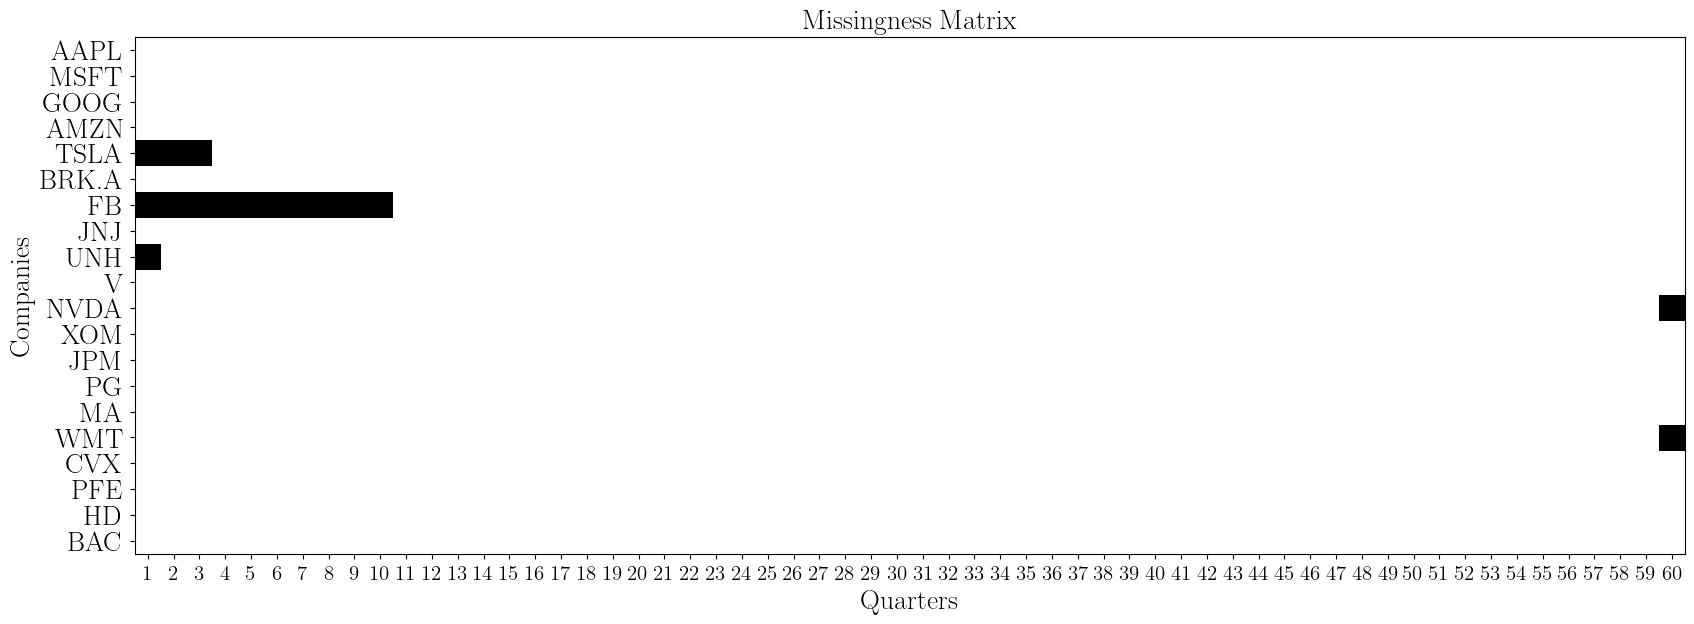

In [15]:
def get_rows_cols(user_user=True):
    cols = [(year, quarter) for year in range(2010, 2025) for quarter in range(1, 5)]
    rows = list(ibes_data.keys())
    if user_user is True:
        return rows, cols
    else:
        return cols, rows
    
rows, cols = get_rows_cols(True)
observed_mat = np.zeros((len(rows), len(cols)))
for i, r in enumerate(rows):
    for j, c in enumerate(cols):
        if quarterly_data.get((r, *c)) is not None:
            observed_mat[i,j] = 1
            
mpl.rcParams['xtick.labelsize'] = 15 
observed_mat = observed_mat[:20,:]
plt.figure(figsize=(20,30))
plt.imshow(observed_mat,cmap='gray')
plt.yticks(ticks=range(20),labels=rows[:20])
plt.xticks(ticks=range(len(cols)),labels=range(1,len(cols)+1))
plt.xlabel('Quarters')
plt.ylabel('Companies')
plt.title("Missingness Matrix")
plt.show()

Looking at the last column, we see that the missignness is very different when analyzing data at a specific date, which is mostly how this would be used in a time-series format. So, let's instead pick a stock and analyze the missigness for the announce dates of that stock.

In [324]:
ticker = 'AAPL'
for col in cols:
    data = quarterly_data.get((ticker, *col))
    if data is None:
        print(col)
        
# Ok, so AAPL has data for all quarters. Makes sense since we alligned to it.
observed_mat = np.ones((len(rows), len(cols)))
for j, c in enumerate(cols):
    aapl_actual, aapl_date, aapl_time  = quarterly_actual.get((ticker, *c))
    aapl_dtime = pd.to_datetime(aapl_date + ' ' + aapl_time, format='%Y-%m-%d %H:%M:%S')
    
    for i, r in enumerate(rows):
        if quarterly_data.get((r, *c)) is None or quarterly_actual.get((r, *c)) is None:
            observed_mat[i,j] = 0
            continue
        _, date, time = quarterly_actual.get((r, *c))
        dtime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %H:%M:%S')
        
        if dtime > aapl_dtime:
            observed_mat[i,j] = 0

observed_mat = observed_mat[:20,1:]

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'BRK.A', 'FB', 'JNJ', 'UNH', 'V', 'NVDA', 'XOM', 'JPM', 'PG', 'MA', 'WMT', 'CVX', 'PFE', 'HD', 'BAC']


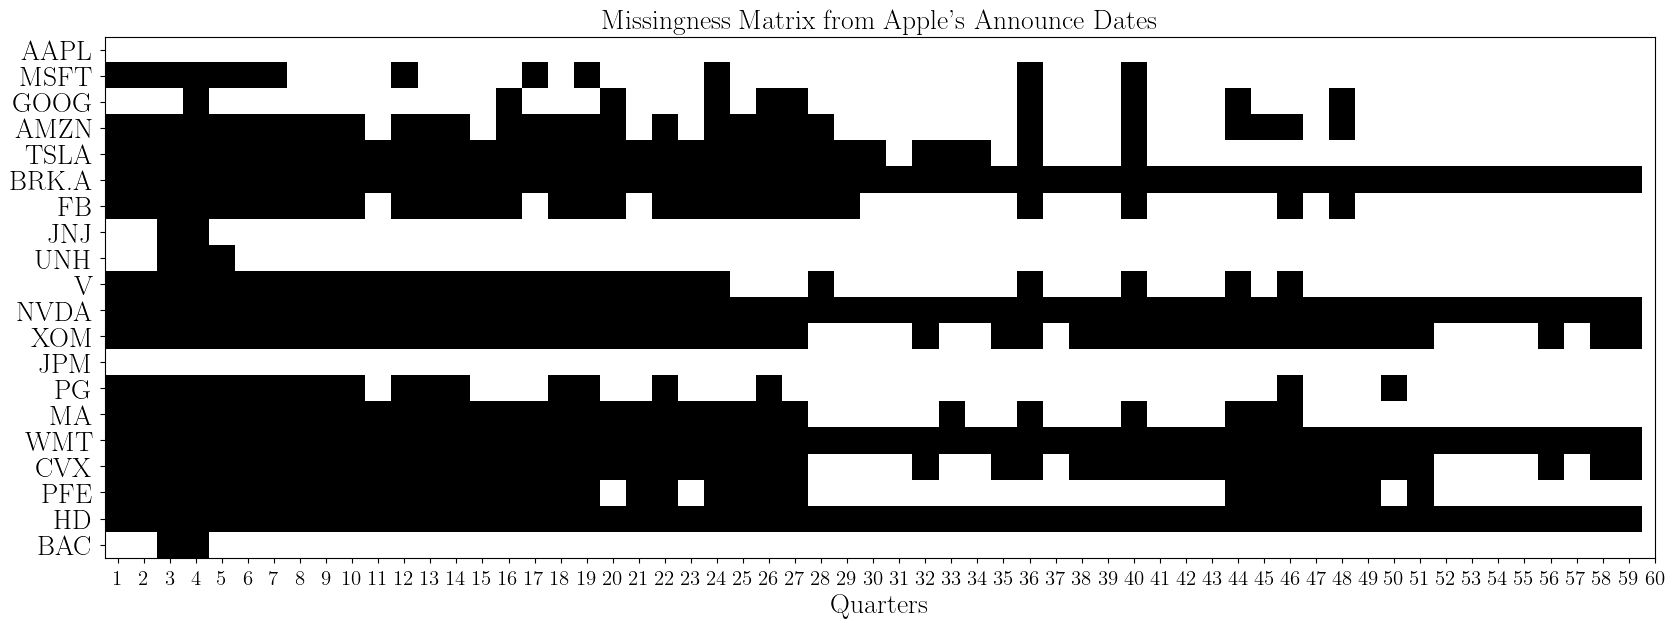

In [325]:
mpl.rcParams['xtick.labelsize'] = 15 
print(rows[:20])
plt.figure(figsize=(20,30))
plt.imshow(observed_mat,cmap='gray')
plt.yticks(ticks=range(20),labels=rows[:20])
plt.xticks(ticks=range(len(cols)),labels=range(1,len(cols)+1))
plt.xlabel('Quarters')
# plt.ylabel('Companies')
plt.title("Missingness Matrix from Apple's Announce Dates")
plt.show()

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'BRK.A', 'FB', 'JNJ', 'UNH', 'V', 'NVDA', 'XOM', 'JPM', 'PG', 'MA', 'WMT', 'CVX', 'PFE', 'HD', 'BAC']


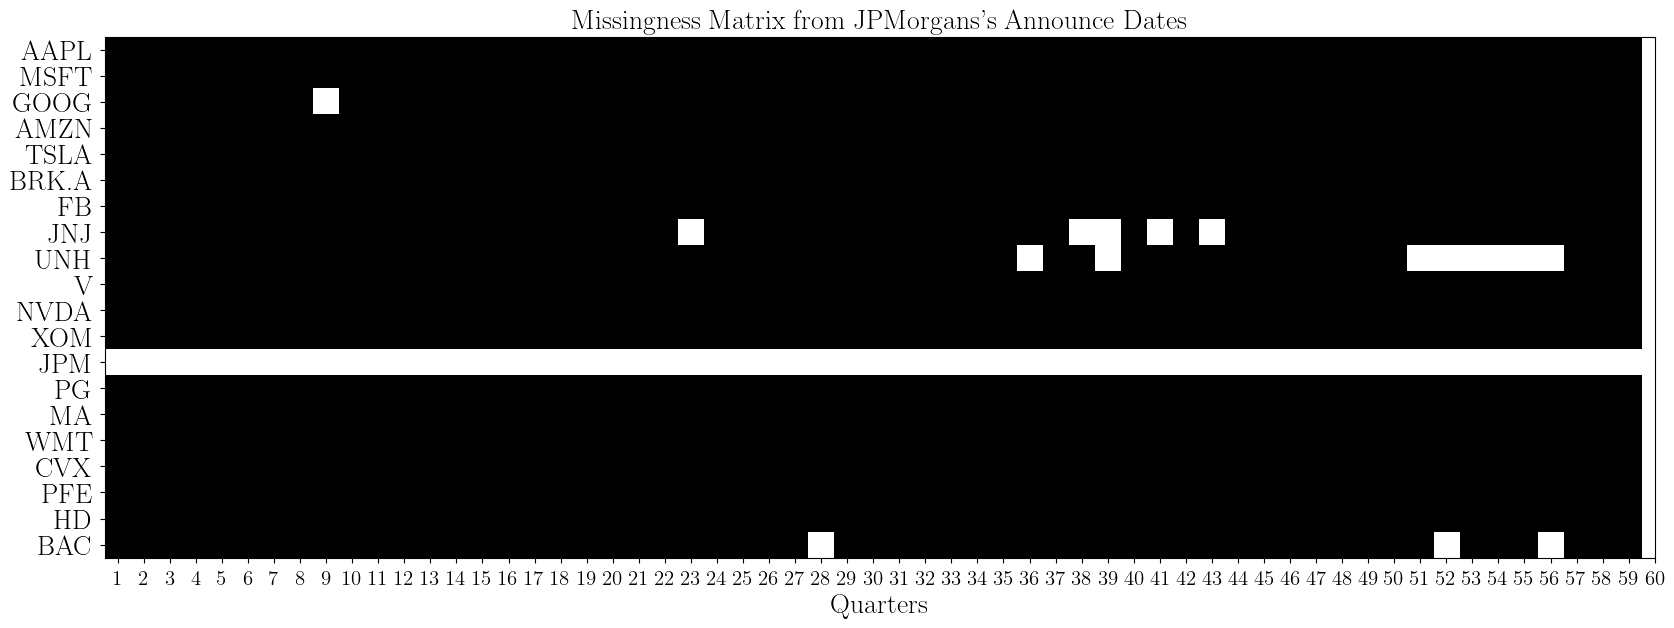

In [529]:
ticker = 'JPM'
for col in cols:
    data = quarterly_data.get((ticker, *col))
    if data is None:
        print(col)
        
# Ok, so AAPL has data for all quarters. Makes sense since we alligned to it.
observed_mat = np.ones((len(rows), len(cols)))
for j, c in enumerate(cols):
    aapl_actual, aapl_date, aapl_time  = quarterly_actual.get((ticker, *c))
    aapl_dtime = pd.to_datetime(aapl_date + ' ' + aapl_time, format='%Y-%m-%d %H:%M:%S')
    
    for i, r in enumerate(rows):
        if quarterly_data.get((r, *c)) is None or quarterly_actual.get((r, *c)) is None:
            observed_mat[i,j] = 0
            continue
        _, date, time = quarterly_actual.get((r, *c))
        dtime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %H:%M:%S')
        
        if dtime > aapl_dtime:
            observed_mat[i,j] = 0

observed_mat = observed_mat[:20,1:]
mpl.rcParams['xtick.labelsize'] = 15 
print(rows[:20])
plt.figure(figsize=(20,30))
plt.imshow(observed_mat,cmap='gray')
plt.yticks(ticks=range(20),labels=rows[:20])
plt.xticks(ticks=range(len(cols)),labels=range(1,len(cols)+1))
plt.xlabel('Quarters')
# plt.ylabel('Companies')
plt.title("Missingness Matrix from JPMorgans's Announce Dates")
plt.show()

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'BRK.A', 'FB', 'JNJ', 'UNH', 'V', 'NVDA', 'XOM', 'JPM', 'PG', 'MA', 'WMT', 'CVX', 'PFE', 'HD', 'BAC']


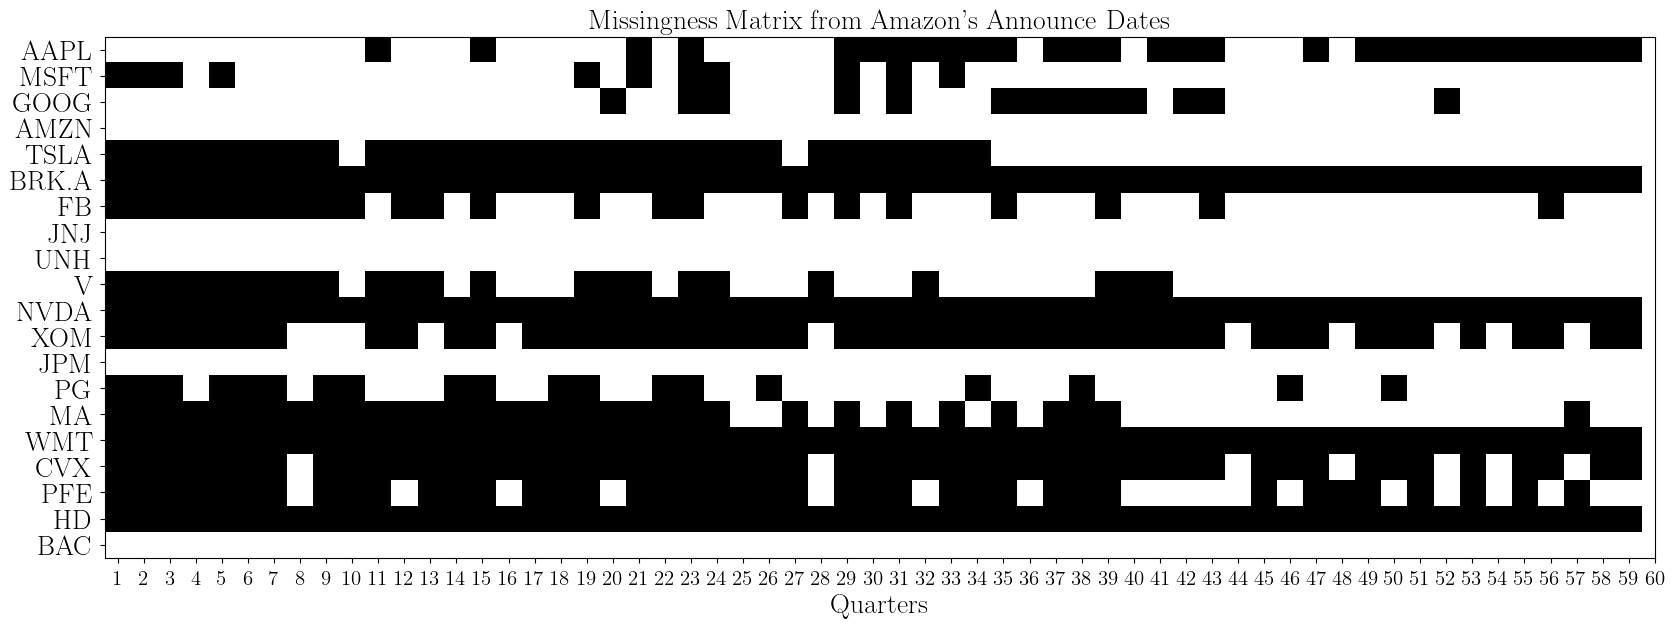

In [329]:
ticker = 'AMZN'
for col in cols:
    data = quarterly_data.get((ticker, *col))
    if data is None:
        print(col)
        
# Ok, so AAPL has data for all quarters. Makes sense since we alligned to it.
observed_mat = np.ones((len(rows), len(cols)))
for j, c in enumerate(cols):
    aapl_actual, aapl_date, aapl_time  = quarterly_actual.get((ticker, *c))
    aapl_dtime = pd.to_datetime(aapl_date + ' ' + aapl_time, format='%Y-%m-%d %H:%M:%S')
    
    for i, r in enumerate(rows):
        if quarterly_data.get((r, *c)) is None or quarterly_actual.get((r, *c)) is None:
            observed_mat[i,j] = 0
            continue
        _, date, time = quarterly_actual.get((r, *c))
        dtime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %H:%M:%S')
        
        if dtime > aapl_dtime:
            observed_mat[i,j] = 0

observed_mat = observed_mat[:20,1:]
mpl.rcParams['xtick.labelsize'] = 15 
print(rows[:20])
plt.figure(figsize=(20,30))
plt.imshow(observed_mat,cmap='gray')
plt.yticks(ticks=range(20),labels=rows[:20])
plt.xticks(ticks=range(len(cols)),labels=range(1,len(cols)+1))
plt.xlabel('Quarters')
# plt.ylabel('Companies')
plt.title("Missingness Matrix from Amazon's Announce Dates")
plt.show()

### Visualizaing the setup

In [445]:
quarterly_actual['AAPL',2019,1]

(np.float64(1.045), '2019-01-29', '16:30:00')

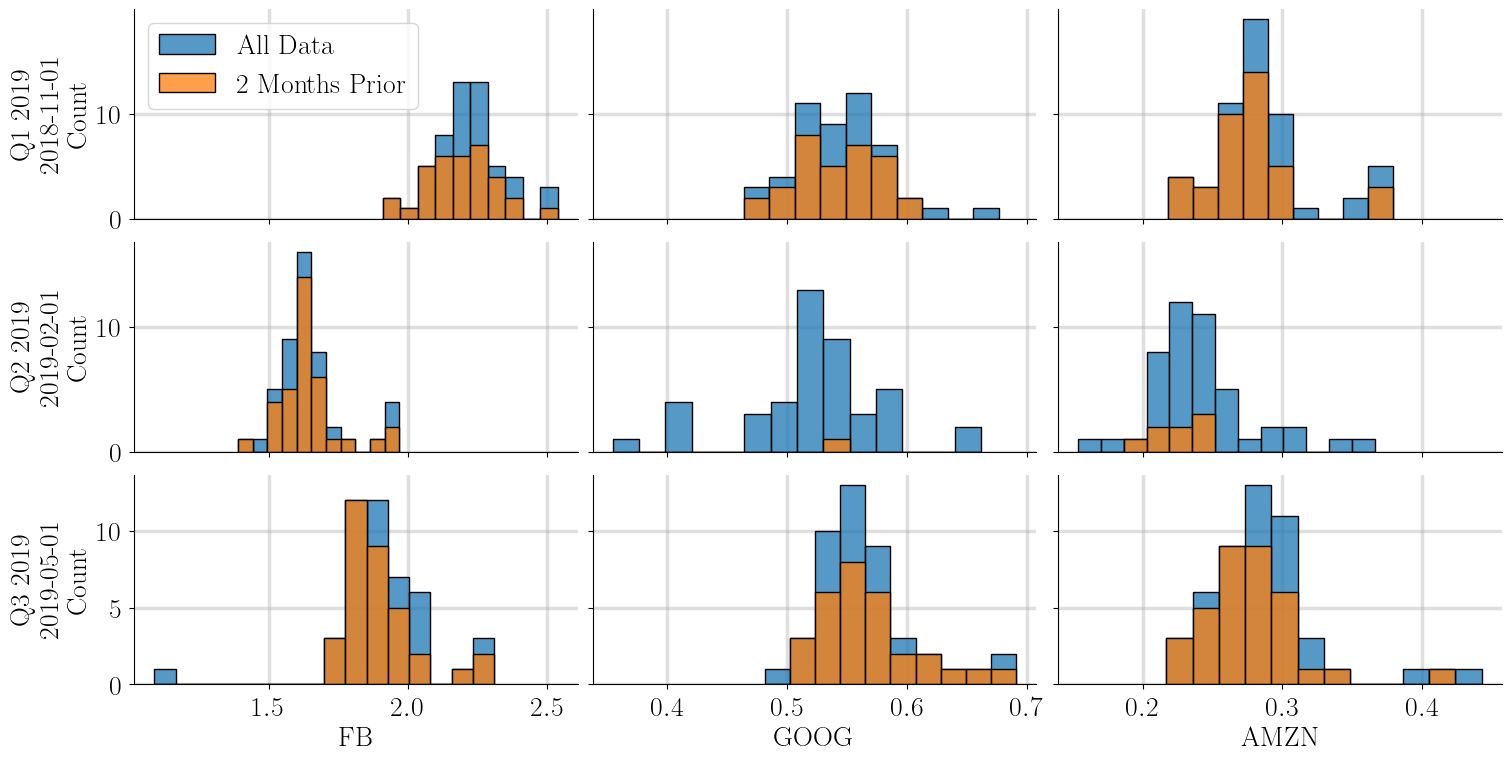

In [488]:
label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
mpl.rcParams['figure.labelsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

fig, axes = plt.subplots(3, 3, figsize=(15, 7.5), layout="compressed", sharex='col', sharey='row')

tickers = ['FB', 'GOOG', 'AMZN']
start_year = 2019
start_quarter = 1

cutoff_dates = [pd.to_datetime('2018-11-01', format='%Y-%m-%d'), 
                pd.to_datetime('2019-02-01', format='%Y-%m-%d'), 
                pd.to_datetime('2019-05-01', format='%Y-%m-%d')]

for i in range(3):
    year = start_year
    quarter = i + start_quarter
    
    axes[i,0].set_ylabel(f'Q{quarter} {year}\n{cutoff_dates[i].strftime("%Y-%m-%d")}\nCount')
    for j in range(3):
        
        t = tickers[j]
        
        
        # aapl_actual = quarterly_actual.get(('AAPL', year, quarter))
        # aapl_dtime = pd.to_datetime(aapl_actual[1] + ' ' + aapl_actual[2], format='%Y-%m-%d %H:%M:%S')
        
        # actual = quarterly_actual.get((t, year, quarter))
        # dtime = pd.to_datetime(actual[1] + ' ' + actual[2], format='%Y-%m-%d %H:%M:%S')
        
        if i == 2:
            axes[i,j].set_xlabel(f'{t}')
        else:
            axes[i,j].set_xlabel('')
            
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        
        # if dtime > aapl_dtime:
        #     # Write missing in the subplot
        #     axes[i,j].text(0.5, 0.5, 'Missing', size=40.0, horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        #     continue
        
        data = quarterly_data.get((t, year, quarter))
        ax = sns.histplot(data=data['value'], ax=axes[i,j])
        
        # Get the bin edges
        bin_edges = [p.get_x() + p.get_width() for p in ax.patches]
        bin_edges = [ax.patches[0].get_x()] + bin_edges

        filtered_data = data[data['ann_datetime'] < cutoff_dates[i]]
        sns.histplot(data=filtered_data['value'], ax=axes[i,j], bins=bin_edges)
        
        if j > 0:
            axes[i,j].set_ylabel('')
            
        if i == 2:
            axes[i,j].set_xlabel(f'{t}')
        else:
            axes[i,j].set_xlabel('')
            
        axes[i,j].grid(True, alpha=0.4)

axes[0,0].legend(['All Data', '2 Months Prior'])
plt.savefig('figures/wrds_earnings.pdf', bbox_inches='tight')
plt.show()

<Axes: ylabel='Count'>

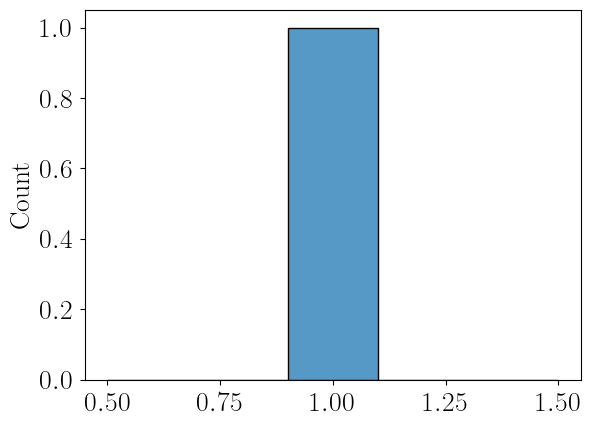

In [466]:
sns.histplot(data=[1], bins=5)

### Dist-NN

In [89]:
def wasserstein2(sample1, sample2):
    """Compute the squared 2-Wasserstein distance between two samples.
    Inputs need to be in format (sample, dimension).
    Args:
        sample1 (np.array): 2D array of samples from the first distribution
        sample2 (np.array): 2D array of samples from the second distribution
    """
    C = ot.dist(sample1, sample2, metric='sqeuclidean')
    # Uniform weights for each empirical distribution
    a = np.ones(len(sample1)) / len(sample1)
    b = np.ones(len(sample2)) / len(sample2)

    # Compute optimal transport plan and Wasserstein distance
    P = ot.emd(a, b, C)
    return np.sum(P * C)

print(wasserstein2(np.array([1,2,1]).reshape(-1,1), np.array([1,5,1]).reshape(-1,1)))
print(np.sum((np.sort(np.array([1,2,1])) - np.sort(np.array([1,5,1]))) ** 2) / len(np.array([1,2,1])))
# This is correct

3.0
3.0


In [90]:
def empirical_quantile_function(samples):
    samples_diff = np.concatenate([np.array(samples[0]).reshape(1), np.diff(samples)])
    def quantile_function(q):
        # Compute the empirical CDF values
        n = len(samples)
        cdf = np.arange(1, n + 1) / n
        # Use broadcasting to calculate the Heaviside contributions
        heaviside_matrix = np.heaviside(np.expand_dims(q,1) - np.expand_dims(cdf, 0), 0.0)
        # Add a column of ones to the left of the Heaviside matrix
        first_col = np.ones(heaviside_matrix.shape[0]).reshape(-1, 1)
        heaviside_matrix = np.concatenate([first_col, heaviside_matrix], axis=1)
        # Remove the last column of Heaviside_matrix
        heaviside_matrix = heaviside_matrix[:, :-1]
        # Compute quantile values by summing contributions
        quantile_values = (heaviside_matrix @ samples_diff)

        return quantile_values
    return quantile_function

def linear_combination(quantile_fns, weights):
    def lin_comb_fn(quantiles):
        # Compute the quantile values for each function
        quantile_values = np.stack([fn(quantiles) for fn in quantile_fns])
        lin_comb_values = np.sum(np.expand_dims(weights,1) * quantile_values, axis=0)
        return lin_comb_values
    return lin_comb_fn

def barycenter(quantile_fns):
    def lin_comb_fn(quantiles):
        # Compute the quantile values for each function
        quantile_values = np.stack([fn(quantiles) for fn in quantile_fns])
        lin_comb_values = np.sum(quantile_values, axis=0) / len(quantile_fns)
        return lin_comb_values
    return lin_comb_fn

def expectation(quantile_func, N = 1000):
    x = np.linspace(0, 1, N)
    return np.trapezoid(quantile_func(x), x=x)

def var(quantile_func, N = 1000):
    x = np.linspace(0, 1, N)
    return np.trapezoid((quantile_func(x) - expectation(quantile_func)) ** 2, x=x)

def squared_diff(quantile_func1, quantile_func2, N = 1000):
    x = np.linspace(0, 1, N)
    return np.trapezoid((quantile_func1(x) - quantile_func2(x)) ** 2, x=x)

def relative_error(est,true):
    return np.abs((est - true) / true)

In [42]:
data = quarterly_data[('AAPL', 2012, 2)]['value']

print(data.std(ddof=0))
print(data.var(ddof=0))
empirical_fn = empirical_quantile_function(np.sort(data.values))
print(np.sqrt(var(empirical_fn)))
print(relative_error(np.sqrt(var(empirical_fn)), data.std(ddof=0)))

0.023571027321545736
0.0005555933289930556
0.0235816056251073
0.000448784154261111


1.9989989989989991
2.0
1.9994994994994995
1.997997997997998


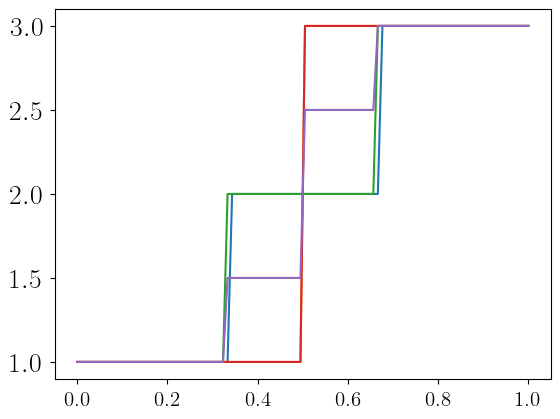

In [330]:
sample_lists = [[1,2,3], [1,3]]

fn1 = empirical_quantile_function(sample_lists[0])
fn2 = empirical_quantile_function(sample_lists[1])

bary_fn = barycenter([fn1, fn2])
lin_fn = linear_combination([fn1, fn1, fn2], [1.0, 1.0, -1.0])
q = np.linspace(0, 1, 100)
for s in sample_lists:
    plt.plot(q, np.quantile(s,q, method='inverted_cdf'))
    
plt.plot(q, fn1(q))
plt.plot(q, fn2(q))
plt.plot(q, bary_fn(q))
# plt.plot(q, lin_fn(q))

print(expectation(fn1))
print(expectation(fn2))
print(expectation(bary_fn))
print(expectation(lin_fn))

In [369]:
# There are a lot of rows, so we will estimate distances for specific rows.
# We will need to make sure that we do not look into the future.
# When calculating distances, we will only look at the past data, using the 
# datestimes when the actual EPS are announced, since we would like to estimate our distributions
# as late as possible (close to the announcement date).

def get_dist(ticker, year, quarter, cutoff_date, quarterly_actual, quarterly_data, user_user = True):
    # Returns the squared Wasserstein distance between rows for 1 column
    # Filters to only use past data
    rows, _ = get_rows_cols(user_user)
    data = quarterly_data[ticker, year, quarter]
    if data is None:
        return {}
    # Filter by the announced_datetime
    # sample1 = data[data['ann_datetime'] < current_datetime]['value'].values.reshape(-1,1)
    filtered_data = data[data['ann_datetime'] < cutoff_date]
    sample1 = filtered_data['value'].values.reshape(-1,1)
    if sample1.shape[0] == 0:
        return None
    # sample1 = data['value'].values.reshape(-1,1)
    dists = dict()
    actual = quarterly_actual[ticker, year, quarter]
    if actual is None:
        raise Exception(f"No actual data for {ticker} {year} {quarter}")
    _, actual_year, actual_time = actual
    actual_dtime = pd.to_datetime(f'{actual_year} {actual_time}', format='%Y-%m-%d %H:%M:%S')
    y = year
    q = quarter
    t = ticker
    for row in rows:
        if user_user:
            t = row
        else:
            y,q = row
        # only include past data
        raw_data = quarterly_data[t, y, q]
        other_actual = quarterly_actual[t, y, q]
        if raw_data is None or other_actual is None:
            continue
        # _, other_year, other_time = other_actual
        # other_dtime = pd.to_datetime(f'{other_year} {other_time}', format='%Y-%m-%d %H:%M:%S')
        # if other_dtime > actual_dtime:
        #     continue
        
        filtered_data = raw_data[raw_data['ann_datetime'] < cutoff_date]
        if filtered_data.shape[0] == 0:
            continue
        sample2 = filtered_data['value'].values.reshape(-1,1)
        dists[row] = wasserstein2(sample1, sample2)
    return dists

test_cell = ('JPM', 2020, 1)
cutoff_date = pd.to_datetime('2020-01-01')
dists = get_dist(*test_cell, cutoff_date, quarterly_actual, quarterly_data, user_user = False)
dists

{(2010, 1): np.float64(2.8473989999999993),
 (2010, 2): np.float64(2.7025703739545994),
 (2010, 3): np.float64(2.397154185185184),
 (2010, 4): np.float64(1.9619901111111104),
 (2011, 1): np.float64(1.6710587979797973),
 (2011, 2): np.float64(1.2324509907407402),
 (2011, 3): np.float64(1.1482603247863241),
 (2011, 4): np.float64(1.542147206427015),
 (2012, 1): np.float64(1.8058912572390566),
 (2012, 2): np.float64(1.2914265502645499),
 (2012, 3): np.float64(1.8163276683501677),
 (2012, 4): np.float64(1.2258878746438742),
 (2013, 1): np.float64(1.163927362573099),
 (2013, 2): np.float64(0.8130768220899471),
 (2013, 3): np.float64(0.7528249866666665),
 (2013, 4): np.float64(0.9948885057471258),
 (2014, 1): np.float64(1.0048859166666666),
 (2014, 2): np.float64(1.551419104273504),
 (2014, 3): np.float64(2.4813941481481354),
 (2014, 4): np.float64(0.8175495703703701),
 (2015, 1): np.float64(0.8787248407407405),
 (2015, 2): np.float64(0.7958851825396824),
 (2015, 3): np.float64(0.70288621574

In [113]:
pd.DataFrame({'value': quarterly_means['AAPL', 2020, 1]['value'], 
              'ann_datetime': quarterly_means['AAPL', 2020, 1]['ann_datetime']}, index=[0])

,value,ann_datetime
0,1.134213,2019-11-23 03:04:33.191489024


In [408]:
threshold = 0.1

neighbors = [row for row, dist in dists.items() if dist < threshold]
neighbors

[(2018, 1), (2019, 1), (2020, 1)]

In [402]:
year = 2020
quarter = 1
ticker = 'AAPL'
actual = quarterly_actual[ticker, year, quarter]
actual_datetime = pd.to_datetime(f'{actual[1]} {actual[2]}', format='%Y-%m-%d %H:%M:%S')

user_user = False
empirical_fn_list = []
for row in neighbors:
    raw_data = quarterly_data[row, year, quarter] if user_user else quarterly_data[ticker, row[0], row[1]]
    filtered_data = raw_data[raw_data['ann_datetime'] < actual_datetime]
    print(row, filtered_data.shape, raw_data.shape)
    empirical_fn_list.append(empirical_quantile_function(np.sort(filtered_data['value'].values)))

(2018, 1) (50, 2) (50, 2)
(2019, 1) (80, 2) (80, 2)
(2020, 1) (47, 2) (47, 2)


1.0681801468134802
1.2475
1.1342127659574466


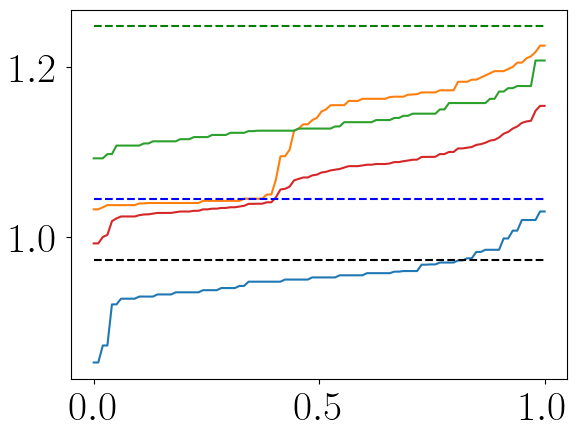

In [405]:
q = np.linspace(0, 1, 100)
for i, fn in enumerate(empirical_fn_list):
    plt.plot(q, fn(q), label='Neighbor ' + str(i))
b_fn = barycenter(empirical_fn_list)
print(expectation(b_fn))
print(quarterly_actual['AAPL', 2020, 1][0])
print(quarterly_data['AAPL', 2020, 1]['value'].mean())
plt.plot(q, b_fn(q), label='Barycenter')
plt.hlines([quarterly_actual['AAPL', 2018, 1][0]], 0, 1, linestyles='--', colors='black')
plt.hlines([quarterly_actual['AAPL', 2019, 1][0]], 0, 1, linestyles='--', colors='blue')
plt.hlines([quarterly_actual['AAPL', 2020, 1][0]], 0, 1, linestyles='--', colors='green')
plt.show()

Hyperparamter tuning: We can tune the hyperparameter threshold with for the first 50% of the columns and use them to predict the last 50% of the columns. The target this time will not be reconstructing the original distribution, but rather predicting the actual quarter EPS.

In [370]:
from collections import defaultdict
from hyperopt import hp, fmin, tpe

def get_neighbor_expectation(eta, dists, quarterly_data):
    neighbors = [cell for cell, dist in dists.items() if dist <= eta]
    # The neighbors should already be filtered
    sample_fns = []
    for cell in neighbors:
        sample = quarterly_data[*cell]
        sample_fns.append(empirical_quantile_function(np.sort(sample['value'].values)))
    b_fn = barycenter(sample_fns)
    return expectation(b_fn)

def get_avg_dist_trains(train_cells, cutoff_date, average_cols, quarterly_actual, quarterly_data, user_user = True):
    # For each training cell, get the average distances from the average cols
    train_cells_avg_dists = defaultdict(dict)
    for cell in train_cells:
        t,y,q = cell
        row_union = set()
        dists = {}
        for col in average_cols:
            dist = get_dist(t, y, q, cutoff_date, quarterly_actual, quarterly_data, user_user)
            row_union = row_union.union(dist.keys())
            dists[col] = dist
        for row in row_union:
            other_cell = (row,y,q) if user_user else (t,*row)
            train_cells_avg_dists[cell][other_cell] = np.mean([dist[row] for dist in dists.values() if row in dist])
    return train_cells_avg_dists

def optimize_eta(average_cols, train_cells, cutoff_date, quarterly_data, quarterly_actual, user_user = True, verbose = False):
    train_cells_avg_dists = get_avg_dist_trains(train_cells, cutoff_date, average_cols, quarterly_actual, quarterly_data, user_user)
    train_cells_empirical_quantile_fns = {
        (t,y,q): empirical_quantile_function(np.sort(quarterly_data[t,y,q]['value'].values)) for t,y,q in train_cells
    }
    
    def obj(params):
        eta = params['eta']
        total_error = 0
        
        for cell in train_cells:
            avg_dist_dict = train_cells_avg_dists[cell]
            neighbors = [c for c, dist in avg_dist_dict.items() if dist <= eta and c != cell]
            
            # The neighbors should already be filtered
            sample_fns = []
            for c in neighbors:
                sample = quarterly_data[*c]
                sample_fns.append(empirical_quantile_function(np.sort(sample['value'].values)))
            if len(sample_fns) == 0:
                total_error += 1000
                continue
            b_fn = barycenter(sample_fns)
            total_error += squared_diff(b_fn, train_cells_empirical_quantile_fns[cell])
            
            # neighbor_expectation = get_neighbor_expectation(eta, avg_dist_dict, quarterly_data)
            # Get actual EPS value
            # eps = quarterly_actual[t, y, q][0]
            # Calculate error
            # total_error += (neighbor_expectation - eps) ** 2
            
        return total_error / len(train_cells)
    
    # Optimize the objective function
    best_eta = fmin(fn=obj, verbose = verbose, space={'eta': hp.loguniform('eta', -10, 2)}, algo=tpe.suggest, max_evals=50)
    # print(f"Baseline: {obj(0.0)}")
    return best_eta['eta']

In [ ]:

average_cols = ['AAPL', 'MSFT', 'AMZN']
train_cells = [
    # ('AAPL', 2017, 1), ('AAPL', 2017, 2), ('AAPL', 2017, 3), ('AAPL', 2017, 4),
    ('AAPL', 2018, 1), ('AAPL', 2018, 2), ('AAPL', 2018, 3), ('AAPL', 2018, 4),
    ('AAPL', 2019, 1), ('AAPL', 2019, 2), ('AAPL', 2019, 3), ('AAPL', 2019, 4)
]
eta = optimize_eta(average_cols, train_cells, quarterly_data, quarterly_actual, user_user = False, verbose = True)

# Test the optimization
test_cell = ('AAPL', 2020, 1)
train_cells_avg_dists = get_avg_dist_trains(train_cells + [test_cell], average_cols, quarterly_actual, quarterly_data, user_user = False)
avg_dist_dict = train_cells_avg_dists[test_cell]
neighbors = [c for c, dist in avg_dist_dict.items() if dist <= eta and c != test_cell]
# The neighbors should already be filtered
sample_fns = []
test_error = 0
for c in neighbors:
    sample = quarterly_data[*c]
    sample_fns.append(empirical_quantile_function(np.sort(sample['value'].values)))
if len(sample_fns) == 0:
    test_error += 1000
if len(sample_fns) > 0:
    b_fn = barycenter(sample_fns)
    test_error += squared_diff(b_fn, empirical_quantile_function(np.sort(quarterly_data[*test_cell]['value'].values)))
print(test_error)

In [384]:
def get_similar_tickers(ticker, year, quarter, cutoff_date, quarterly_actual, quarterly_data, user_user = False, verbose=False):
    rows, cols = get_rows_cols(user_user)
    current_row = (year, quarter)
    row_index = rows.index(current_row)
    
    actual = quarterly_actual[ticker, year, quarter]
    if actual is None:
        raise Exception(f"No actual data for {ticker, year, quarter}")
    # Create vectors of distances
    distance_vectors = dict()
    iterator = tqdm(cols) if verbose else cols
    for t in iterator:
        distance = np.zeros(row_index) # row_index + 1 to include the current row
        try:
            dist = get_dist(t, year, quarter, cutoff_date, quarterly_actual, quarterly_data, user_user=False)
            for i in range(0, row_index):
                if rows[i] in dist:
                    distance[i] = dist[rows[i]]
                else:
                    distance[i] = np.nan
            distance_vectors[t] = distance
        except Exception:
            continue
    return distance_vectors

In [433]:
def test_train_wasserstein(test_cell, cutoff_date, quarterly_data, quarterly_actual, user_user = False, verbose = False, num_missing = 10):
    _,year,quarter = test_cell
    
    _,cols = get_rows_cols(user_user)
    
    actual = quarterly_actual.get(test_cell)
    if actual is None:
        return None
    # _, actual_date, _ = actual
    # actual_dtime = pd.to_datetime(f'{actual_date}', format='%Y-%m-%d')
    # (i) Same quarter different years
    # dates_average = [(year - i,quarter) for i in range(1,3)]
    
    # (ii) Previous 8 quarters
    dates_average = []
    current_date = (year,quarter)
    for _ in range(8):
        dates_average.append(current_date)
        if current_date[1] == 1:
            current_date = (current_date[0] - 1, 4)
        else:
            current_date = (current_date[0], current_date[1] - 1)
    dates_average = dates_average[1:] # exclude the current quarter
            
    # Get missing tickers in the same column
    missing_tickers = []
    for t in cols:
        other_actual = quarterly_actual.get((t,year,quarter))
        if other_actual is None:
            continue # we need test data
        # _, other_actual_date, _ = other_actual
        # other_actual_dtime = pd.to_datetime(f'{other_actual_date}', format='%Y-%m-%d')
        # if other_actual_dtime > actual_dtime:
        #     missing_tickers.append(t)
        other_data = quarterly_data.get((t,year,quarter))
        filtered_data = other_data[other_data['ann_datetime'] < cutoff_date]
        if filtered_data.shape[0] / other_data.shape[0] < 0.2 and filtered_data.shape[0] >= 1: 
            # at least 50% of the data needs to be in the future
            missing_tickers.append(t)
    
    missing_tickers_subset = missing_tickers[:num_missing] # These are what we test on
    missing_tickers = set(missing_tickers)
    # Test the missing tickers
    prev_date = dates_average[0]
    
    output = dict()
    
    for missing_ticker in (pbar := tqdm(missing_tickers_subset)):
        pbar.set_description(f"Processing {missing_ticker}")
        # Get top 20 similar tickers
        try:
            distance_vectors = get_similar_tickers(missing_ticker, 
                                                prev_date[0], prev_date[1], cutoff_date,
                                                quarterly_actual, quarterly_data, 
                                                user_user=user_user,verbose=False)
            if missing_ticker not in distance_vectors: # if there is no data for the ticker
                continue
            cur_vec = distance_vectors[missing_ticker]
            similarity = []
            for t, vec in distance_vectors.items():
                if t in missing_tickers or t == missing_ticker: # only consider observed tickers
                    continue
                other_data = quarterly_data.get((t,year,quarter))
                if other_data is None:
                    continue
                filtered_data = other_data[other_data['ann_datetime'] < cutoff_date]
                if filtered_data.shape[0] / other_data.shape[0] < 0.4 or filtered_data.shape[0] < 5: # at least 40% of the data needs to be seen
                    continue
                similarity.append((t, np.nanmean((vec - cur_vec) ** 2)))
            similarity.sort(key = lambda x: x[1])
            similar_tickers = [t for t, _ in similarity[:30]]
            # Train cells (previous 8 quarters)
            train_cells = [(missing_ticker, y, q) for y,q in dates_average[:4]]
            
            # Optimize the estimator
            eta = optimize_eta(similar_tickers, train_cells, cutoff_date, quarterly_data, quarterly_actual, user_user = user_user, verbose=False)
            
            # Calculate the estimate
            # The first argument is merely for a key in the dictionary (not used in calculation)
            train_cells_avg_dists = get_avg_dist_trains([(missing_ticker,year,quarter)], cutoff_date, similar_tickers, quarterly_actual, quarterly_data, user_user)
            
            avg_dist_dict = train_cells_avg_dists[missing_ticker,year,quarter]
            
            neighbors = [c for c, dist in avg_dist_dict.items() if dist <= eta]
            # The neighbors should already be filtered
            sample_fns = []
            
            for c in neighbors:
                sample = quarterly_data[*c]
                sample_fns.append(empirical_quantile_function(np.sort(sample['value'].values)))
            if len(sample_fns) == 0:
                continue
            b_fn = barycenter(sample_fns)
            
            output[missing_ticker] = {
                'b_fn': b_fn,
                'actual_data': quarterly_data.get((missing_ticker,year,quarter))
            }
        except Exception as e:
            continue
    return output

In [415]:
def get_earnings_time(cell, quarterly_actual):
    actual = quarterly_actual.get(cell)
    if actual is None:
        return None
    _, actual_date, actual_time = actual
    return pd.to_datetime(f'{actual_date} {actual_time}', format='%Y-%m-%d %H:%M:%S')

In [434]:
test_cell = ('AAPL', 2019, 1)
actual_dtime = get_earnings_time(test_cell, quarterly_actual)
cutoff_date = pd.to_datetime('2018-11-01', format='%Y-%m-%d')

In [435]:
test_dict_distnn = test_train_wasserstein(test_cell, cutoff_date, quarterly_data, quarterly_actual, user_user = False, verbose = True, num_missing = 60)

Processing HL: 100%|██████████| 60/60 [11:36<00:00, 11.60s/it]  


In [ ]:
# data for just means
quarterly_means = dict()
quarterly_medians = dict()
quarterly_stds = dict()
quarterly_VaRs = dict()

alpha = 0.05

for k, v in tqdm(quarterly_data.items(), total=len(quarterly_data)):
    if v is None:
        continue
    values = v['value']
    mean = values.mean()
    median = values.median()
    std = values.std()
    VaR = np.quantile(-1 * values, 1 - alpha)
    last_date = v['ann_datetime'].iloc[-1]
    
    quarterly_means[k] = pd.DataFrame({'value': mean, 'ann_datetime': last_date}, index=[0])
    quarterly_medians[k] = pd.DataFrame({'value': median, 'ann_datetime': last_date}, index=[0])
    quarterly_stds[k] = pd.DataFrame({'value': std, 'ann_datetime': last_date}, index=[0])
    quarterly_VaRs[k] = pd.DataFrame({'value': VaR, 'ann_datetime': last_date}, index=[0])

100%|██████████| 118740/118740 [00:43<00:00, 2714.82it/s]


In [137]:
test_cell = ('AAPL', 2019, 1)
num_missing = 30
test_dict_distnn = test_train_wasserstein(test_cell, quarterly_data, quarterly_actual, user_user = False, verbose = True, num_missing = num_missing)
test_dict_means = test_train_wasserstein(test_cell, quarterly_means, quarterly_actual, user_user = False, verbose = True, num_missing = num_missing)
test_dict_medians = test_train_wasserstein(test_cell, quarterly_medians, quarterly_actual, user_user = False, verbose = True, num_missing = num_missing)
test_dict_stds = test_train_wasserstein(test_cell, quarterly_stds, quarterly_actual, user_user = False, verbose = True, num_missing = num_missing)
test_dict_VaRs = test_train_wasserstein(test_cell, quarterly_VaRs, quarterly_actual, user_user = False, verbose = True, num_missing = num_missing)

Processing COP: 100%|██████████| 30/30 [01:30<00:00,  3.03s/it] 


In [418]:
label_size = 30
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

In [490]:
test_dict_distnn.keys()

dict_keys(['EOG', 'PXD', 'KHC', 'SCCO', 'AIG', 'WELL', 'HES', 'AVB', 'OKE', 'UDR', 'FANG', 'ETR', 'CLR', 'CF', 'PKI', 'PFG', 'BG', 'EQT', 'APA', 'AR', 'CHK', 'QRVO', 'GLPI', 'DISH', 'DINO', 'MMP', 'ZNGA', 'SWN', 'RGLD', 'PDCE', 'BRX', 'NFG', 'CACI', 'MTDR', 'MUR', 'TDOC', 'PENN', 'AM', 'SM', 'ATUS', 'MSGS', 'AB', 'CRK', 'PK', 'SEAS', 'PBF', 'NXRT', 'RARE', 'CRC', 'CVI', 'WLL', 'CPE', 'SITC', 'VSAT', 'LBRT', 'IBP', 'NEX', 'HL'])

In [586]:
def convert_to_hist(emp_fn, bin_edges):
    # Compute the quantile values for each bin edge
    q = np.linspace(0, 1, 100)
    quantiles = emp_fn(q)
    
    # Compute the probability mass for each bin 
    bin_heights = np.zeros(len(bin_edges) - 1)
    for i in range(len(bin_edges) - 1):
        index_in_quantiles = np.searchsorted(quantiles, bin_edges[i])
        next_index = np.searchsorted(quantiles, bin_edges[i + 1])
        if next_index == len(quantiles):
            next_index = len(quantiles) - 1
        if index_in_quantiles == len(quantiles):
            index_in_quantiles = len(quantiles) - 1
        bin_heights[i] = q[next_index] - q[index_in_quantiles]
        
    bin_heights /= np.diff(bin_edges)
    # Compute the bin centers
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return bin_centers, bin_heights

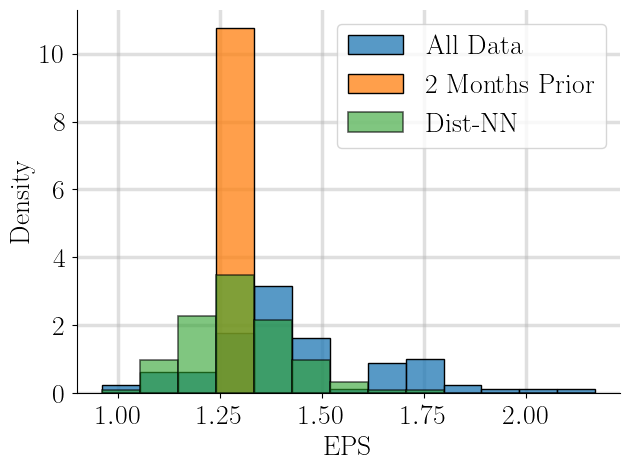

In [614]:
missing_ticker = 'EOG'
b_fn = test_dict_distnn[missing_ticker]['b_fn']
actual_data = test_dict_distnn[missing_ticker]['actual_data']
actual = actual_data['value'].values
filtered_data = actual_data[actual_data['ann_datetime'] < cutoff_date]['value'].values

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

sns.histplot(data=actual, label='All Data', stat='density', ax=ax)

# Get the bin edges
bin_edges = [p.get_x() + p.get_width() for p in ax.patches]
bin_edges = [ax.patches[0].get_x()] + bin_edges

sns.histplot(filtered_data, bins = bin_edges, label='2 Months Prior', stat='density')

bin_centers, bin_heights = convert_to_hist(b_fn, np.array(bin_edges))
ax.bar(bin_centers, bin_heights, width=np.diff(bin_edges), 
       alpha=0.6, align='center', edgecolor="black", linewidth=1.2, label='Dist-NN')

plt.xlabel('EPS')
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig(f'figures/histogram_{missing_ticker}.pdf', bbox_inches='tight')

<BarContainer object of 7 artists>

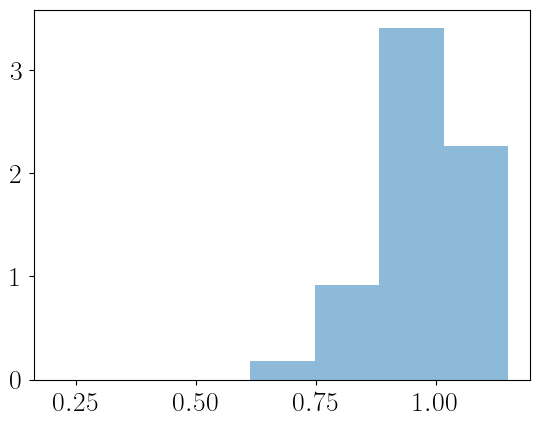

In [556]:
np.sum(bin_heights * np.diff(bin_edges))

np.float64(0.9099099099099099)

In [538]:
np.sum(bin_heights)

np.float64(0.9090909090909092)

In [537]:
np.sum(bin_heights * 0.13428571)

np.float64(0.1220779181818182)

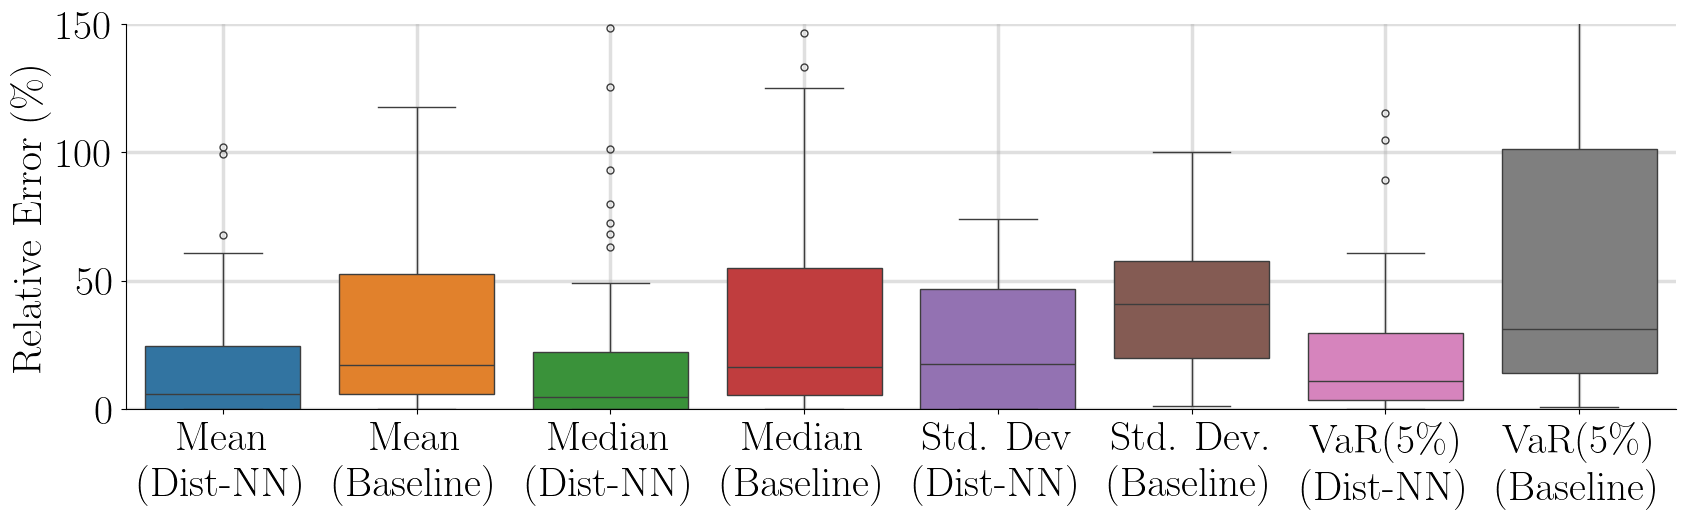

In [442]:
mean_errors = []
median_errors = []
std_errors = []
VaR_errors = []

mean_errors_baseline = []
median_errors_baseline = []
std_errors_baseline = []
VaR_errors_baseline = []

alpha = 0.05

for t, sub_dict in test_dict_distnn.items():
    b_fn = sub_dict['b_fn']
    actual_data = sub_dict['actual_data']
    
    cutoff_data = actual_data[actual_data['ann_datetime'] < cutoff_date]
    
    est_mean = expectation(b_fn)
    est_median = b_fn(np.array([0.5]))[0]
    est_std = np.sqrt(var(b_fn))
    est_VaR = np.quantile(-1 * b_fn(np.linspace(0, 1, 1000)), 1 - alpha)
    
    baseline_est_mean = cutoff_data['value'].mean()
    baseline_est_median = cutoff_data['value'].median()
    baseline_est_std = cutoff_data['value'].std()
    baseline_est_VaR = np.quantile(-1 * cutoff_data['value'].values, 1 - alpha)
    
    empirical_fn = empirical_quantile_function(np.sort(actual_data['value'].values))
    actual_mean = actual_data['value'].mean()
    actual_median = actual_data['value'].median()
    actual_std = np.sqrt(var(empirical_fn)) # we do it this way to keep it consistent with the estimation procedure
    actual_VaR = np.quantile(-1 * actual_data['value'].values, 1 - alpha)
    
    mean_errors.append(relative_error(est_mean, actual_mean) * 100)
    median_errors.append(relative_error(est_median, actual_median) * 100)
    std_errors.append(relative_error(est_std, actual_std) * 100)
    VaR_errors.append(relative_error(est_VaR, actual_VaR) * 100)
    
    mean_errors_baseline.append(relative_error(baseline_est_mean, actual_mean) * 100)
    median_errors_baseline.append(relative_error(baseline_est_median, actual_median) * 100)
    std_errors_baseline.append(relative_error(baseline_est_std, actual_std) * 100)
    VaR_errors_baseline.append(relative_error(baseline_est_VaR, actual_VaR) * 100)
        
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=[mean_errors,mean_errors_baseline, median_errors, median_errors_baseline, std_errors, std_errors_baseline, VaR_errors, VaR_errors_baseline])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)
ax.set_ylim(bottom=0, top=150)
ax.set_xticklabels(["Mean\n(Dist-NN)", "Mean\n(Baseline)", "Median\n(Dist-NN)", "Median\n(Baseline)", "Std. Dev\n(Dist-NN)", "Std. Dev.\n(Baseline)", "VaR(5\%)\n(Dist-NN)", "VaR(5\%)\n(Baseline)"])
plt.ylabel("Relative Error (\%)")
plt.savefig('wrds_all_metrics.pdf', bbox_inches='tight')
plt.show()

{'EOG': {'b_fn': <function __main__.barycenter.<locals>.lin_comb_fn(quantiles)>,
  'actual_data':       value        ann_datetime
  2390  1.750 2018-11-01 21:31:00
  2391  1.670 2018-11-02 03:30:00
  2392  1.750 2018-11-02 13:21:00
  2393  1.747 2018-11-02 06:11:00
  2394  1.790 2018-11-04 20:37:00
  ...     ...                 ...
  2470  1.070 2019-02-07 03:08:00
  2471  1.200 2019-02-11 04:06:00
  2472  1.370 2019-01-25 12:43:00
  2473  1.367 2019-02-22 17:00:00
  2474  1.170 2019-02-08 06:30:00
  
  [85 rows x 2 columns]},
 'PXD': {'b_fn': <function __main__.barycenter.<locals>.lin_comb_fn(quantiles)>,
  'actual_data':       value        ann_datetime
  2796  2.130 2018-11-06 21:54:00
  2797  1.460 2018-10-10 16:12:00
  2798  1.740 2018-11-07 11:36:00
  2799  2.131 2018-11-07 23:00:00
  2800  2.030 2018-11-07 16:50:00
  ...     ...                 ...
  2892  1.510 2019-01-17 00:44:00
  2893  1.270 2019-02-08 06:30:00
  2894  1.398 2019-02-01 14:18:00
  2895  1.640 2019-02-07 14:33:

In [410]:
b_fn = test_train_wasserstein(('AAPL', 2020, 1), quarterly_data, quarterly_actual, user_user = False, verbose = True)
if b_fn is None:
    print('No similar tickers found')

Calculating similar tickers...


100%|██████████| 1979/1979 [00:06<00:00, 290.54it/s]


Optimizing the estimator...
Calculating the estimate...


In [414]:
alpha = 0.05

actual_mean = quarterly_data['AAPL', 2020, 1]['value'].mean()
actual_median = np.median(quarterly_data['AAPL', 2020, 1]['value'].values)
actual_std = quarterly_data['AAPL', 2020, 1]['value'].std()
actual_VaR = np.quantile(-1 * quarterly_data['AAPL', 2020, 1]['value'].values, 1 - alpha)

est_mean = expectation(b_fn)
est_median = b_fn(np.array([0.5]))[0]
est_std = np.sqrt(var(b_fn))
est_VaR = np.quantile(-1 * b_fn(np.linspace(0, 1, 1000)), 1 - alpha)

print(relative_error(est_mean, actual_mean))
print(relative_error(est_median, actual_median))
print(relative_error(est_std, actual_std))
print(relative_error(est_VaR, actual_VaR))

0.015672702604307386
0.011086474501108608
1.8165372461076388
0.06320541760722334


In [87]:
oftics = [oftic for oftic,_ in ibes_tickers]

In [ ]:
output_dict = test_train_wasserstein(('AAPL', 2020, 1), quarterly_means, quarterly_actual,
                                     user_user = False, verbose = True, num_missing = 30)

Processing BRK.A: 100%|██████████| 5/5 [00:16<00:00,  3.20s/it]


In [118]:
import random

dates = [
    (2018, 1), (2018, 2), (2018, 3), (2018, 4),
    (2019, 1), (2019, 2), (2019, 3), (2019, 4), 
    (2020, 1), (2020, 2), (2020, 3), (2020, 4),
    (2021, 1), (2021, 2), (2021, 3), (2021, 4),
    (2022, 1), (2022, 2), (2022, 3), (2022, 4),
    (2023, 1), (2023, 2), (2023, 3), (2023, 4),
    (2024, 1), (2024, 2), (2024, 3), (2024, 4)
]

alpha = 0.05

tickers = random.sample(oftics[:300], 100)
output_file = 'wasserstein_errors.csv'
errors = []
file_exists = False
for t in tqdm(tickers):
    rand_dates = random.sample(dates, 15)
    for y,q in rand_dates:
        test_cell = (t,y,q)
        # try:
        b_fn = test_train_wasserstein(test_cell, quarterly_data, quarterly_actual, user_user = False)
        b_fn_means = test_train_wasserstein(test_cell, quarterly_means, quarterly_actual, user_user = False)
        break
            # if b_fn is None:
            #     continue
            
            # actual_mean = quarterly_data[*test_cell]['value'].mean()
            # actual_median = np.median(quarterly_data[*test_cell]['value'].values)
            # empirical_fn = empirical_quantile_function(np.sort(quarterly_data[*test_cell]['value'].values))
            # actual_std = np.sqrt(var(empirical_fn))
            # actual_VaR = np.quantile(-1 * quarterly_data[*test_cell]['value'].values, 1 - alpha)

            # est_mean = expectation(b_fn)
            # est_median = b_fn(np.array([0.5]))[0]
            # est_std = np.sqrt(var(b_fn))
            # est_VaR = np.quantile(-1 * b_fn(np.linspace(0, 1, 1000)), 1 - alpha)
            
            # df = pd.DataFrame({'ticker': [t], 
            #                    'year': [y], 
            #                    'quarter': [q], 
            #                    'mean_error': [relative_error(est_mean, actual_mean)], 
            #                    'median_error': [relative_error(est_median, actual_median)],
            #                    'std_error': [relative_error(est_std, actual_std)],
            #                    'VaR_error': [relative_error(est_VaR, actual_VaR)]})
            
            # if not file_exists:
            #     # Write header only for the first row
            #     df.to_csv(output_file, mode='w', index=False)
            #     file_exists = True
            # else:
            #     # Append to the file without writing the header
            #     df.to_csv(output_file, mode='a', index=False, header=False)
            
        # except Exception as e:
        #     print(f"Error for {test_cell}: {e}")
        #     continue
    break

  0%|          | 0/100 [00:00<?, ?it/s]

(2024, 1)


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_9223/2580861593.py:58: RuntimeWarning: Mean of empty slice
  similarity.append((t, np.nanmean((vec - cur_vec) ** 2)))
  0%|          | 0/100 [00:21<?, ?it/s]


KeyboardInterrupt: 

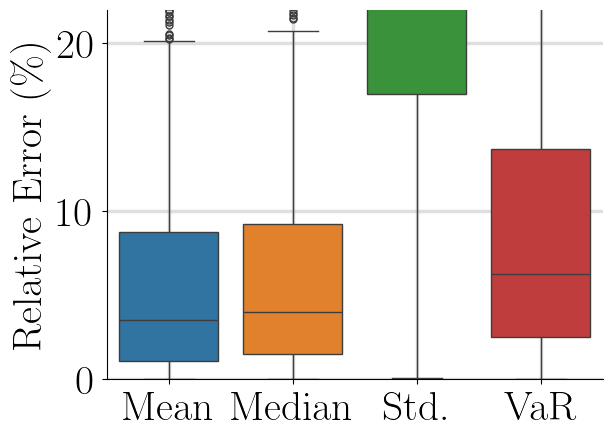

In [393]:
errors = pd.read_csv('wasserstein_errors.csv')

label_size = 30
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

errors_total = np.array([errors['mean_error'].values * 100, 
                         errors['median_error'].values * 100,
                         errors['std_error'].values * 100,
                         errors['VaR_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Mean", "Median", "Std.", "VaR"])
ax.set_ylim(bottom=0, top=22)
plt.ylabel("Relative Error (\%)")
plt.show()

1.1164365865865866 1.1342127659574466
Relative Error: 1.57%


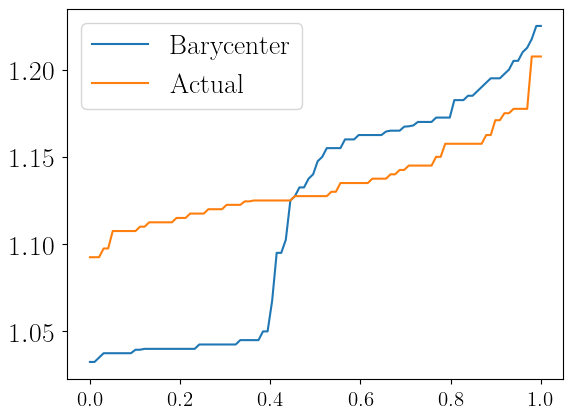

In [365]:
quantiles = np.linspace(0, 1, 100)
test_cell = ('AAPL', 2020, 1)
plt.plot(quantiles, b_fn(quantiles))
plt.plot(quantiles, empirical_quantile_function(np.sort(quarterly_data[*test_cell]['value'].values))(quantiles))
plt.legend(['Barycenter', 'Actual'])
actual_mean = quarterly_data[*test_cell]['value'].mean()
print(expectation(b_fn), actual_mean)
print(f"Relative Error: {relative_error(expectation(b_fn), quarterly_data[*test_cell]['value'].mean())*100:.2f}%")
plt.show()

For a doubly-robust estimator, we could optimize both thresholds separately or simultaneously. We will do the latter.

In [210]:
def get_doubly_robust_estimate(user_user_neighbor_fns, item_item_neighbor_fns, cross_neighbor_fns):
    sample_fns = []
    for cell1, user_fn in user_user_neighbor_fns.items():
        for cell2, item_fn in item_item_neighbor_fns.items():
            cross_fn = cross_neighbor_fns.get((cell1, cell2))
            if cross_fn is None:
                continue
            sample_fns.append(linear_combination([user_fn, item_fn, cross_fn], [1.0, 1.0, -1.0]))
    # I have no guarantees that this doubly-robust estimator will remain a quantile function.
    # In fact, it most likely will not be because of the negative part.
    return expectation(barycenter(sample_fns))

def get_empirical_quantile_functions(train_cells, train_cells_avg_dists_user_user, train_cells_avg_dists_item_item, quarterly_data):
    user_user_fns = defaultdict(dict)
    item_item_fns = defaultdict(dict)
    cross_fns = defaultdict(dict)
    
    for cell in train_cells:
        avg_dist_dict_user_user = train_cells_avg_dists_user_user[cell]
        avg_dist_dict_item_item = train_cells_avg_dists_item_item[cell]
        
        for c in avg_dist_dict_user_user.keys():
            user_user_fns[cell][c] = empirical_quantile_function(np.sort(quarterly_data[*c]['value'].values))
        for c in avg_dist_dict_item_item.keys():
            item_item_fns[cell][c] = empirical_quantile_function(np.sort(quarterly_data[*c]['value'].values))
        for c1 in avg_dist_dict_user_user.keys():
            for c2 in avg_dist_dict_item_item.keys():
                data = quarterly_data.get((c1[0], c2[1], c2[2]))
                if data is None:
                    continue
                cross_fns[cell][(c1,c2)] = empirical_quantile_function(np.sort(data['value'].values))
                
    return user_user_fns, item_item_fns, cross_fns

def optimize_eta_doubly_robost(average_dates, average_tickers, train_cells, quarterly_data, quarterly_actual, verbose=False):
    if verbose:
        print('Calculating average distances...')
    train_cells_avg_dists_user_user = get_avg_dist_trains(train_cells, average_dates, quarterly_actual, quarterly_data, user_user = True)
    train_cells_avg_dists_item_item = get_avg_dist_trains(train_cells, average_tickers, quarterly_actual, quarterly_data, user_user = False)
    
    if verbose:
        print('Calculate empirical quantile functions...')
    # Calculate the empirical quantile functions for each possible neighbor
    user_user_fns, item_item_fns, cross_fns = get_empirical_quantile_functions(train_cells, 
                                                                               train_cells_avg_dists_user_user, 
                                                                               train_cells_avg_dists_item_item, 
                                                                               quarterly_data)
    
    def obj(params):
        eta_user_user = params['eta_user_user']
        eta_item_item = params['eta_item_item']
        total_error = 0
        
        for cell in train_cells:
            # Get user-user neighbors
            neighbors_user_user = [c for c, dist in train_cells_avg_dists_user_user[cell].items() if dist <= eta_user_user]
            user_user_neighbor_fns = {c: user_user_fns[cell][c] for c in neighbors_user_user}
            
            # Get item-item neighbors
            neighbors_item_item = [c for c, dist in train_cells_avg_dists_item_item[cell].items() if dist <= eta_item_item]
            item_item_neighbor_fns = {c: item_item_fns[cell][c] for c in neighbors_item_item}
            
            # Calculate doubly-robust estimate
            neighbor_expectation = get_doubly_robust_estimate(user_user_neighbor_fns, item_item_neighbor_fns, cross_fns[cell])
            # Get actual EPS value
            eps = quarterly_actual[*cell][0]
            # Calculate error
            # total_error += (neighbor_expectation - eps) ** 2
            total_error += np.abs((neighbor_expectation - eps) / eps)
            
        return total_error / len(train_cells)
    
    if verbose:
        print("Optimizing thresholds...")
    # Optimize the objective function
    best_eta = fmin(fn=obj, verbose = verbose, 
                    space={
                        'eta_user_user': hp.loguniform('eta_user_user', -5, 1),
                        'eta_item_item': hp.loguniform('eta_item_item', -5, 1)
                    }, 
                    algo=tpe.suggest, max_evals=20)
    
    return best_eta['eta_user_user'], best_eta['eta_item_item']

In [196]:
eta_user, eta_item = optimize_eta_doubly_robost([(2018, 1), (2019, 1), (2020, 1)], ['AAPL', 'MSFT'], [('AAPL', 2020, 1)], quarterly_data, quarterly_actual, verbose=True)

Calculating average distances...
Calculate empirical quantile functions...
Optimizing thresholds...
100%|██████████| 30/30 [00:04<00:00,  6.94trial/s, best loss: 0.055512031953517234]


In [197]:
eta_user, eta_item

(np.float64(0.059899208524044546), np.float64(0.17681376836173018))

In [198]:
test_cell = ('AAPL', 2020, 1)

avg_dists_user_user = get_avg_dist_trains([test_cell], [(2018, 1), (2019, 1), (2020, 1)], quarterly_actual, quarterly_data, user_user = True)
avg_dists_item_item = get_avg_dist_trains([test_cell], ['AAPL', 'MSFT'], quarterly_actual, quarterly_data, user_user = False)

user_user_fns, item_item_fns, cross_fns = get_empirical_quantile_functions([test_cell], avg_dists_user_user, 
                                                                           avg_dists_item_item, quarterly_data)

# Get user-user neighbors
neighbors_user_user = [c for c, dist in avg_dists_user_user[test_cell].items() if dist <= eta_user]
user_user_neighbor_fns = {c: user_user_fns[test_cell][c] for c in neighbors_user_user}

# Get item-item neighbors
neighbors_item_item = [c for c, dist in avg_dists_item_item[test_cell].items() if dist <= eta_item]
item_item_neighbor_fns = {c: item_item_fns[test_cell][c] for c in neighbors_item_item}

neighbor_expectation = get_doubly_robust_estimate(user_user_neighbor_fns, item_item_neighbor_fns, cross_fns[test_cell])

print(relative_error(neighbor_expectation, quarterly_actual[*test_cell][0]))
print(relative_error(quarterly_data[*test_cell]['value'].mean(), quarterly_actual[*test_cell][0]))

0.055512031953517234
0.09081141005415108


In [199]:
print(neighbor_expectation, quarterly_actual[*test_cell][0], quarterly_data[*test_cell]['value'].mean())

1.1782487401379873 1.2475 1.1342127659574466


In [201]:
test_cell = ('AAPL', 2020, 2)

avg_dists_user_user = get_avg_dist_trains([test_cell], [(2018, 1), (2019, 1), (2020, 1)], quarterly_actual, quarterly_data, user_user = True)
avg_dists_item_item = get_avg_dist_trains([test_cell], ['AAPL', 'MSFT'], quarterly_actual, quarterly_data, user_user = False)

user_user_fns, item_item_fns, cross_fns = get_empirical_quantile_functions([test_cell], avg_dists_user_user, 
                                                                           avg_dists_item_item, quarterly_data)

# Get user-user neighbors
neighbors_user_user = [c for c, dist in avg_dists_user_user[test_cell].items() if dist <= eta_user]
user_user_neighbor_fns = {c: user_user_fns[test_cell][c] for c in neighbors_user_user}

# Get item-item neighbors
neighbors_item_item = [c for c, dist in avg_dists_item_item[test_cell].items() if dist <= eta_item]
item_item_neighbor_fns = {c: item_item_fns[test_cell][c] for c in neighbors_item_item}

neighbor_expectation = get_doubly_robust_estimate(user_user_neighbor_fns, item_item_neighbor_fns, cross_fns[test_cell])

print(relative_error(neighbor_expectation, quarterly_actual[*test_cell][0]))
print(relative_error(quarterly_data[*test_cell]['value'].mean(), quarterly_actual[*test_cell][0]))

0.06719471247796321
0.02091928864569082


We have at least shown that in these cases, the doubly-robust estimator is better than user-user and item-item and, finally, the baseline. Now, we need to test out the doubly-robust estimator on more than just 2 cells in the matrix.

We need to decide how we will do this. I think that we can pick 50 tickers almost at random, then choose specific dates to leave out as test cells. Then, for each test cell, we can train a doubly-robust estimator based on cells with the same ticker, but for previous quarters. Then, we can predict the test cell and compare it to the actual value.

For date averaging, we can do previous quarters with a few options:

(i) The same quarter different years

(ii) Same year, different quarters (or previous 4 quarters)

(iii) All previous quarters

For ticker averaging, we can choose specific tickers or use the similar tickers method to calculate similar tickers to use for averaging.

In [ ]:
distance_vectors = get_similar_tickers('AAPL', 2020, 1, quarterly_actual, quarterly_data)

In [111]:
cur_vec = distance_vectors['AAPL']
ticker_dist_threshold = 0.02
similar_tickers = []
for t, vec in distance_vectors.items():
    if np.nanmean((vec - cur_vec) ** 2) < ticker_dist_threshold:
        similar_tickers.append(t)
len(similar_tickers)

7

In [124]:
print(similar_tickers)
oftics = [oftic for oftic,_ in ibes_tickers]

['AAPL', 'COOP', 'KRTX', 'SG', 'BOOT', 'NOVA', 'CEIX']


In [222]:
def train_test_cell(test_cell, quarterly_data, quarterly_actual, verbose=False):
    ticker,year,quarter = test_cell
    # (i) Same quarter different years
    # dates_average = [(year - i,quarter) for i in range(1,3)]
    
    # (ii) Previous 8 quarters
    dates_average = []
    current_date = (year,quarter)
    for _ in range(8):
        dates_average.append(current_date)
        if current_date[1] == 1:
            current_date = (current_date[0] - 1, 4)
        else:
            current_date = (current_date[0], current_date[1] - 1)
            
    # (iii) All previous quarters
    
    if verbose:
        print('Calculating similar tickers...')
    # Get top 20 similar tickers
    distance_vectors = get_similar_tickers(ticker, year, quarter, quarterly_actual, quarterly_data, verbose=verbose)
    cur_vec = distance_vectors[ticker]
    similarity = []
    for t, vec in distance_vectors.items():
        similarity.append((t, np.nanmean((vec - cur_vec) ** 2)))
    similarity.sort(key = lambda x: x[1])
    similar_tickers = [t for t, _ in similarity[:20]]
    
    # Train cells (previous 4 quarters)
    train_cells = [(ticker, y,q) for y,q in dates_average[:4]]
        
    if verbose:
        print('Optimizing the doubly-robust estimator...')
    # Optimize the doubly-robust estimator
    eta_user, eta_item = optimize_eta_doubly_robost(dates_average, similar_tickers, train_cells, quarterly_data, quarterly_actual, verbose=verbose)
    
    if verbose:
        print('Calculating the doubly-robust estimate...')
    
    # Get the doubly-robust estimate for the test cell
    avg_dists_user_user = get_avg_dist_trains([test_cell], dates_average + [(year,quarter)], quarterly_actual, quarterly_data, user_user = True)
    avg_dists_item_item = get_avg_dist_trains([test_cell], similar_tickers, quarterly_actual, quarterly_data, user_user = False)
    
    user_user_fns, item_item_fns, cross_fns = get_empirical_quantile_functions([test_cell], avg_dists_user_user, avg_dists_item_item, quarterly_data)
    
    # Get user-user neighbors
    neighbors_user_user = [c for c, dist in avg_dists_user_user[test_cell].items() if dist <= eta_user]
    user_user_neighbor_fns = {c: user_user_fns[test_cell][c] for c in neighbors_user_user}

    # Get item-item neighbors
    neighbors_item_item = [c for c, dist in avg_dists_item_item[test_cell].items() if dist <= eta_item]
    item_item_neighbor_fns = {c: item_item_fns[test_cell][c] for c in neighbors_item_item}

    neighbor_expectation = get_doubly_robust_estimate(user_user_neighbor_fns, item_item_neighbor_fns, cross_fns[test_cell])
    
    if verbose:
        print('Calculating relative errors...')
    eps_actual = quarterly_actual[*test_cell][0]
    return relative_error(neighbor_expectation, eps_actual), relative_error(quarterly_data[*test_cell]['value'].mean(), eps_actual)

test_error, baseline_error = train_test_cell(('AAPL', 2019, 3), quarterly_data, quarterly_actual, verbose=True)
print(f"Dist-NN Relative Error:  {test_error * 100:.2f}%")
print(f"Baseline Relative Error: {baseline_error * 100:.2f}%")

Calculating similar tickers...


100%|██████████| 1979/1979 [00:06<00:00, 298.72it/s]


Optimizing the doubly-robust estimator...
Calculating average distances...
Calculate empirical quantile functions...
Optimizing thresholds...
100%|██████████| 20/20 [02:58<00:00,  8.92s/trial, best loss: 0.041743724689373624]
Calculating the doubly-robust estimate...
Calculating relative errors...
Dist-NN Relative Error:  4.12%
Baseline Relative Error: 3.67%


In [225]:
import random

dates = [(2018, 1), (2018, 2), (2018, 3), (2018, 4),
         (2019, 1), (2019, 2), (2019, 3), (2019, 4), 
         (2020, 1), (2020, 2), (2020, 3), (2020, 4),
         (2021, 1), (2021, 2), (2021, 3), (2021, 4),
         (2022, 1), (2022, 2), (2022, 3), (2022, 4),
         (2023, 1), (2023, 2), (2023, 3), (2023, 4),
         (2024, 1), (2024, 2), (2024, 3), (2024, 4)]

tickers = random.sample(oftics[:300], 100)
output_file = 'doubly_robust_errors.csv'
errors = []
file_exists = False
for t in tqdm(tickers):
    rand_dates = random.sample(dates, 3)
    for y,q in rand_dates:
        test_cell = (t,y,q)
        try:
            test_error, baseline_error = train_test_cell(test_cell, quarterly_data, quarterly_actual, verbose=False)
            df = pd.DataFrame({'ticker': [t], 
                               'year': [y], 
                               'quarter': [q], 
                               'test_error': [test_error], 
                               'base_error': [baseline_error]})
            
            if not file_exists:
                # Write header only for the first row
                df.to_csv(output_file, mode='w', index=False)
                file_exists = True
            else:
                # Append to the file without writing the header
                df.to_csv(output_file, mode='a', index=False, header=False)
            
        except Exception as e:
            print(f"Error for {test_cell}: {e}")
            continue

  0%|          | 0/100 [00:00<?, ?it/s]job exception: need at least one array to stack


Error for ('KHC', 2020, 1): need at least one array to stack


  1%|          | 1/100 [02:48<4:38:15, 168.64s/it]

Error for ('LCID', 2018, 2): No actual data for ('LCID', 2018, 2)


job exception: need at least one array to stack
  2%|▏         | 2/100 [02:57<2:02:01, 74.71s/it] 

Error for ('LCID', 2021, 4): need at least one array to stack
Error for ('LCID', 2020, 4): No actual data for ('LCID', 2020, 4)


  4%|▍         | 4/100 [07:01<2:39:57, 99.98s/it] 

Error for ('ATVI', 2024, 4): No actual data for ('ATVI', 2024, 4)


 49%|████▉     | 49/100 [2:34:54<2:47:23, 196.92s/it]

Error for ('SIVB', 2024, 2): No actual data for ('SIVB', 2024, 2)


 75%|███████▌  | 75/100 [3:40:34<1:34:50, 227.63s/it]

Error for ('PXD', 2024, 4): No actual data for ('PXD', 2024, 4)


 88%|████████▊ | 88/100 [4:18:40<50:46, 253.84s/it]  job exception: need at least one array to stack


Error for ('UBER', 2019, 4): need at least one array to stack


 92%|█████████▏| 92/100 [4:25:23<18:51, 141.50s/it]

Error for ('ES', 2020, 3): No actual data for ('ES', 2020, 3)
Error for ('ES', 2021, 4): No actual data for ('ES', 2021, 4)
Error for ('ES', 2019, 2): No actual data for ('ES', 2019, 2)


 97%|█████████▋| 97/100 [4:43:35<09:14, 184.72s/it]

Error for ('MRVL', 2024, 4): No actual data for ('MRVL', 2024, 4)


 98%|█████████▊| 98/100 [4:55:09<10:54, 327.33s/it]

Error for ('OTIS', 2019, 4): No actual data for ('OTIS', 2019, 4)
Error for ('OTIS', 2019, 3): No actual data for ('OTIS', 2019, 3)


100%|██████████| 100/100 [4:59:26<00:00, 179.67s/it]


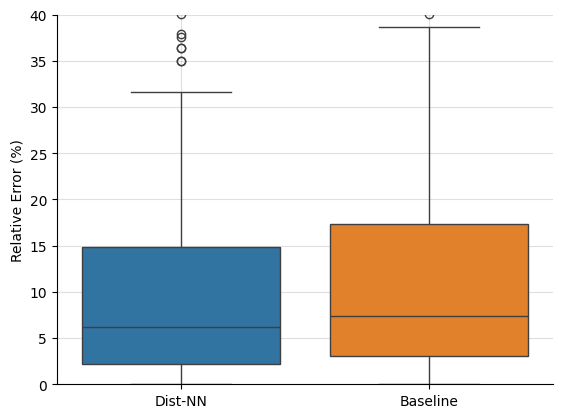

In [229]:
import seaborn as sns

dr_errors = pd.read_csv(output_file)
errors_total = np.array([dr_errors['test_error'].values * 100, dr_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=40)
plt.ylabel("Relative Error (%)")
plt.show()

In [763]:
output_file = 'errors_item_item_small.csv'
_, cols = get_rows_cols(user_user=False)

# eta = optimize_eta(ticker, year, quarter, cols[:train_test_split], quarterly_actual, quarterly_data, quarterly_means, user_user = True, verbose=True)
# eta = optimize_eta(ticker, 2020, 1, cols[:200], quarterly_actual, quarterly_data, quarterly_means, user_user = False, verbose=True)
subset_tickers = set(cols[:100])
year = 2024
quarter = 3

file_exists = False
for t in tqdm(subset_tickers):
    train_cols = list(subset_tickers - set(t))
    test_cols = [t]
    try:
        eta = optimize_eta(t, year, quarter, list(train_cols), quarterly_actual, quarterly_data, quarterly_means, user_user = False, verbose=False)
        test_error = evaluate_eta_test(eta, t, year, quarter, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means, user_user=False)
        base_error = evaluate_eta_test(0.0, t, year, quarter, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means, user_user=False)
        
        df = pd.DataFrame({'ticker': [t], 'eta': [eta], 'test_error': [test_error], 'base_error': [base_error]})
        if not file_exists:
            # Write header only for the first row
            df.to_csv(output_file, mode='w', index=False)
            file_exists = True
        else:
            # Append to the file without writing the header
            df.to_csv(output_file, mode='a', index=False, header=False)
    except Exception as e:
        continue

100%|██████████| 100/100 [08:01<00:00,  4.82s/it]


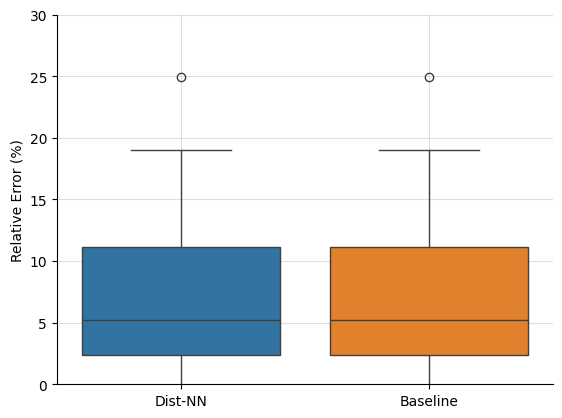

In [764]:
errors = pd.read_csv('errors_item_item_small.csv')
import seaborn as sns

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=30)
plt.ylabel("Relative Error (%)")
plt.show()

In [392]:
import random

i = 0
output_file = 'test_errors_4_periods.csv'
train_test_split = 6
start = 12
train_cols = cols[start:train_test_split + start]
test_cols = cols[start + train_test_split:start + train_test_split+1]
subset_tickers = random.sample(list(ibes_data.keys()), 30)
print(subset_tickers)
for oftic in tqdm(subset_tickers):
    try:
        eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means, verbose=False)
        test_error = evaluate_eta_test(eta, oftic, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means)
        base_error = evaluate_eta_test(0.0, oftic, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means)
        
        df = pd.DataFrame({'ticker': [oftic], 'eta': [eta], 'test_error': [test_error], 'base_error': [base_error]})
        if i == 0:
            # Write header only for the first row
            df.to_csv(output_file, mode='w', index=False)
        else:
            # Append to the file without writing the header
            df.to_csv(output_file, mode='a', index=False, header=False)
        i += 1
    except Exception as e:
        print(f"Error for {oftic}: {e}")

['CTVA', 'META', 'CPRT', 'ALLE', 'TXT', 'NOC', 'QRVO', 'EXPD', 'GOOG', 'DECK', 'BBY', 'TSCO', 'STLD', 'SLB', 'DOC', 'TTWO', 'CVS', 'ANSS', 'PLTR', 'ELV', 'WM', 'CZR', 'IEX', 'ALL', 'PNR', 'BX', 'ETN', 'GLW', 'ANET', 'CB']


 63%|██████▎   | 19/30 [00:46<00:17,  1.58s/it]

Error for PLTR: division by zero


100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


In [393]:
errors = pd.read_csv('test_errors_4_periods.csv')
errors

,ticker,eta,test_error,base_error
0,CTVA,0.258356,0.030084,0.030084
1,META,0.335891,0.094381,0.094381
2,CPRT,0.003063,0.154483,0.086844
3,ALLE,0.333640,0.163547,0.058524
4,TXT,0.355385,0.178752,0.041070
5,NOC,0.194893,0.048187,0.064329
6,QRVO,0.005987,0.182938,0.182938
7,EXPD,0.001012,0.002858,0.002858
8,GOOG,0.367176,0.253971,0.024612
9,DECK,0.138133,0.039959,0.245275


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/4150476019.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


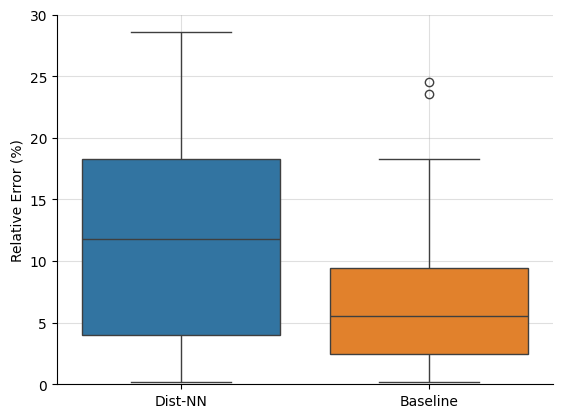

In [394]:
import seaborn as sns

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=30)
plt.ylabel("Relative Error (%)")
plt.show()

This is a bit unrealistic since there is so much time between quarters. What would really happen is that the parameters would be updated each timestep using a window (rolling or not rolling) approach.

We will try out a few approaches:
1. Growing window size
2. Rolling window
3. Seasonal window (only use the same quarter data)

In [492]:
# Growing window size

output_file = 'rolling_window_10.csv'
_, cols = get_rows_cols()

i = 0
subset_tickers = random.sample(list(ibes_data.keys()), 50)
print(subset_tickers)

start = 10
for j in range(start, len(cols)):
    train_cols = cols[j-10:j]
    test_col = cols[j]
    print(train_cols, test_col)
    i = 0
    year, quarter = test_col
    for oftic in tqdm(subset_tickers):
        try:
            eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means)
            test_error = evaluate_eta_test(eta, oftic, train_cols, [test_col], quarterly_actual, quarterly_data, quarterly_means)
            base_error = evaluate_eta_test(0, oftic, train_cols, [test_col], quarterly_actual, quarterly_data, quarterly_means)
            
            df = pd.DataFrame({'ticker': [oftic],
                                'year': [year],
                                'quarter': [quarter],
                                'eta': [eta], 
                                'test_error': [test_error], 
                                'base_error': [base_error]})
            if i == 0 and j == start:
                # Write header only for the first row
                df.to_csv(output_file, mode='w', index=False)
            else:
                # Append to the file without writing the header
                df.to_csv(output_file, mode='a', index=False, header=False)
            i += 1
        except Exception as e:
            print(f"Error for {oftic}: {e}")

['GM', 'VICI', 'FITB', 'PPG', 'EMR', 'DPZ', 'BRK.B', 'BWA', 'MDT', 'T', 'RCL', 'PH', 'UHS', 'DAY', 'CVS', 'TER', 'NSC', 'JBHT', 'CEG', 'ZTS', 'UDR', 'ABBV', 'AMD', 'AZO', 'ROL', 'DRI', 'CBOE', 'CSX', 'TSLA', 'GOOGL', 'ALB', 'ED', 'CARR', 'DVA', 'ABNB', 'CHRW', 'AVY', 'O', 'IQV', 'TXT', 'LVS', 'KDP', 'PSA', 'LUV', 'MPWR', 'SO', 'TMUS', 'MSFT', 'BLK', 'MOH']
[(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2)] (2022, 3)


 36%|███▌      | 18/50 [01:11<02:08,  4.00s/it]job exception: (2020, 1)


Error for CEG: (2020, 1)


 42%|████▏     | 21/50 [01:16<01:10,  2.45s/it]

Error for UDR: (2020, 1)


 50%|█████     | 25/50 [01:28<01:04,  2.59s/it]

Error for ROL: (2020, 1)


job exception: (2020, 1)
 52%|█████▏    | 26/50 [01:29<00:50,  2.10s/it]

Error for DRI: (2020, 1)


 66%|██████▌   | 33/50 [02:02<01:09,  4.09s/it]

Error for CARR: (2020, 1)


job exception: (2020, 1)
 68%|██████▊   | 34/50 [02:03<00:48,  3.06s/it]

Error for DVA: (2020, 1)


job exception: (2020, 1)
 70%|███████   | 35/50 [02:04<00:34,  2.31s/it]

Error for ABNB: (2020, 1)


 74%|███████▍  | 37/50 [02:08<00:28,  2.22s/it]

Error for AVY: (2020, 1)


job exception: (2020, 1)
 76%|███████▌  | 38/50 [02:09<00:20,  1.73s/it]

Error for O: (2020, 1)


 84%|████████▍ | 42/50 [02:21<00:18,  2.32s/it]

Error for KDP: (2020, 1)


job exception: (2020, 1)
 86%|████████▌ | 43/50 [02:22<00:12,  1.82s/it]

Error for PSA: (2020, 1)


 90%|█████████ | 45/50 [02:26<00:09,  1.94s/it]

Error for MPWR: (2020, 1)


100%|██████████| 50/50 [02:45<00:00,  3.32s/it]


[(2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3)] (2022, 4)


 38%|███▊      | 19/50 [01:12<01:32,  2.98s/it]

Error for CEG: (2020, 2)


 70%|███████   | 35/50 [02:28<00:54,  3.63s/it]

Error for ABNB: (2020, 2)


100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


[(2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4)] (2023, 1)


 38%|███▊      | 19/50 [01:16<01:33,  3.03s/it]

Error for CEG: (2020, 3)


 70%|███████   | 35/50 [02:24<00:47,  3.19s/it]

Error for ABNB: (2020, 3)


100%|██████████| 50/50 [03:28<00:00,  4.16s/it]


[(2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1)] (2023, 2)


 38%|███▊      | 19/50 [01:16<01:35,  3.08s/it]

Error for CEG: (2020, 4)


 70%|███████   | 35/50 [02:26<01:04,  4.29s/it]

Error for ABNB: (2020, 4)


100%|██████████| 50/50 [03:26<00:00,  4.12s/it]


[(2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2)] (2023, 3)


 38%|███▊      | 19/50 [01:14<01:36,  3.11s/it]

Error for CEG: (2021, 1)


 58%|█████▊    | 29/50 [02:01<01:35,  4.56s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:23<00:00,  4.06s/it]


[(2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3)] (2023, 4)


 38%|███▊      | 19/50 [01:17<01:34,  3.05s/it]

Error for CEG: (2021, 2)


 52%|█████▏    | 26/50 [01:43<01:22,  3.42s/it]

Error for DRI: index 0 is out of bounds for axis 0 with size 0


 58%|█████▊    | 29/50 [01:56<01:18,  3.74s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


[(2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4)] (2024, 1)


 38%|███▊      | 19/50 [01:16<01:32,  2.99s/it]

Error for CEG: (2021, 3)


 58%|█████▊    | 29/50 [01:54<01:13,  3.51s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:19<00:00,  3.99s/it]


[(2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1)] (2024, 2)


 38%|███▊      | 19/50 [01:16<02:03,  3.99s/it]

Error for CEG: (2021, 4)


 58%|█████▊    | 29/50 [01:52<01:14,  3.55s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:13<00:00,  3.87s/it]


[(2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1), (2024, 2)] (2024, 3)


 38%|███▊      | 19/50 [01:15<01:34,  3.05s/it]

Error for CEG: (2022, 1)


 40%|████      | 20/50 [01:18<01:34,  3.14s/it]

Error for ZTS: No neighbors found for ('ZTS', 2024, 3)


 48%|████▊     | 24/50 [01:30<01:13,  2.83s/it]

Error for AZO: division by zero


 52%|█████▏    | 26/50 [01:35<01:01,  2.55s/it]

Error for DRI: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:15<00:00,  3.91s/it]


[(2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1), (2024, 2), (2024, 3)] (2024, 4)


 18%|█▊        | 9/50 [00:34<02:02,  2.99s/it]

Error for MDT: division by zero


 40%|████      | 20/50 [01:15<01:51,  3.72s/it]

Error for ZTS: No neighbors found for ('ZTS', 2024, 4)


 48%|████▊     | 24/50 [01:29<01:30,  3.49s/it]

Error for AZO: (2024, 3)


100%|██████████| 50/50 [03:15<00:00,  3.91s/it]


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/3481507872.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


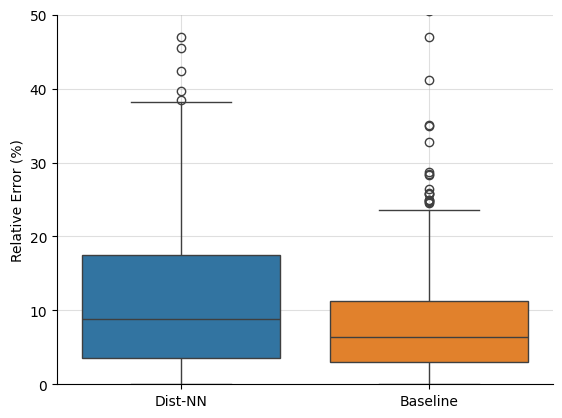

In [422]:
errors = pd.read_csv('growing_window.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [442]:
oftics = [oftic for oftic,_ in ibes_tickers]
indices = []
for i, row in errors.iterrows():
    indices.append(oftics.index(row['ticker']))
errors['index'] = indices

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1650903057.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


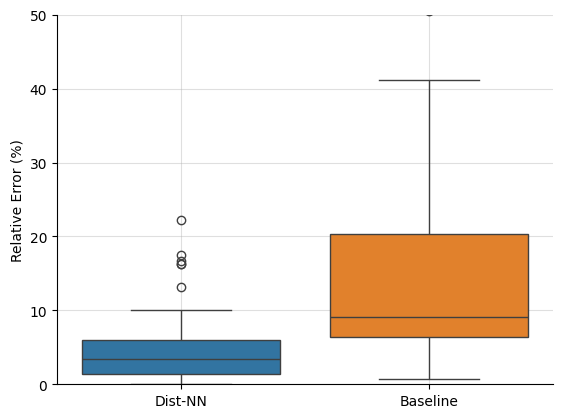

In [443]:
better_errors = errors[errors['test_error'] < errors['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

If we can find a feature that gets us close to this plot such as market cap or number of estimators perhaps, then we can make an argument that is a valid plot.

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1043540077.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


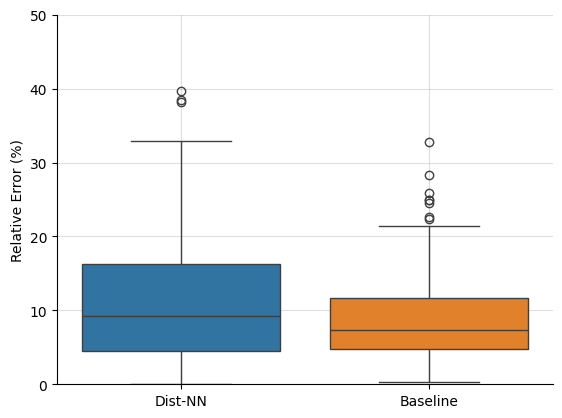

In [456]:
filtered_errors = errors[errors['index'] < 200]

errors_total = np.array([filtered_errors['test_error'].values * 100, filtered_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [457]:
# Now, we need to calculate the average number of estimators
avg_estimator = dict()
_,cols = get_rows_cols()
for oftic in oftics:
    num_estimators = 0
    num_added = 0
    for c in cols:
        if quarterly_data[oftic, c[0], c[1]] is None:
            continue
        num_estimators += quarterly_data[oftic, c[0], c[1]].shape[0]
        num_added += 1
    avg_estimator[oftic] = num_estimators / num_added

In [461]:
avg_estimator_list = [avg_estimator[oftic] for oftic in errors['ticker'].tolist()]
errors['avg_estimator'] = avg_estimator_list
errors

,ticker,year,quarter,eta,test_error,base_error,index,avg_estimator
0,VICI,2022,1,0.008461,0.025039,0.028754,284,9.450000
1,DTE,2022,1,0.043091,0.247447,0.247447,323,18.050000
2,NOW,2022,1,0.006604,0.032139,0.032139,33,27.600000
3,BR,2022,1,0.016009,0.019794,0.019794,310,8.450000
4,EVRG,2022,1,0.264330,3.970156,0.131069,432,7.550000
...,...,...,...,...,...,...,...,...
261,DAY,2024,3,0.320633,0.058526,0.256915,457,11.250000
262,IPG,2024,3,0.223077,0.141171,0.023729,464,10.100000
263,AMAT,2024,3,0.009071,0.042455,0.042455,76,21.750000
264,NVDA,2024,3,0.359988,0.200558,0.034758,1,37.526316


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/62601540.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


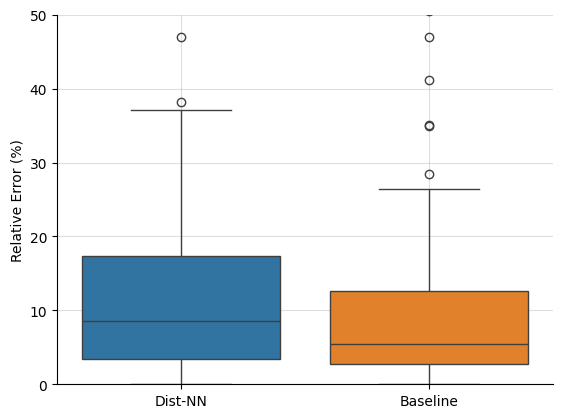

In [482]:
filtered_errors = errors[(errors['avg_estimator'] > 10) & (errors['avg_estimator'] < 30) & (errors['index'] > 300)]

errors_total = np.array([filtered_errors['test_error'].values * 100, filtered_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [476]:
filtered_errors

,ticker,year,quarter,eta,test_error,base_error,index,avg_estimator
0,VICI,2022,1,0.008461,0.025039,0.028754,284,9.45
3,BR,2022,1,0.016009,0.019794,0.019794,310,8.45
4,EVRG,2022,1,0.264330,3.970156,0.131069,432,7.55
25,VICI,2022,2,0.014780,0.455588,0.168523,284,9.45
28,BR,2022,2,0.357686,0.171230,0.038105,310,8.45
29,EVRG,2022,2,0.220188,0.176624,0.063098,432,7.55
50,VICI,2022,3,0.007398,0.022400,0.070773,284,9.45
53,BR,2022,3,0.328742,0.275176,0.011359,310,8.45
54,EVRG,2022,3,0.339807,0.022560,0.016226,432,7.55
75,VICI,2022,4,0.006052,0.697291,0.697291,284,9.45


In [409]:
errors_grouped = errors.groupby(['ticker']).mean()
errors_grouped.sort_values('test_error')

,year,quarter,eta,test_error,base_error
ticker,,,,,
PWR,2022.909091,2.363636,0.034904,0.035793,0.043004
CBOE,2022.909091,2.363636,0.030088,0.061619,0.051183
AMAT,2022.909091,2.363636,0.006058,0.061723,0.061723
FTV,2022.909091,2.363636,0.190502,0.062400,0.036602
CNP,2022.909091,2.363636,0.050398,0.066076,0.065785
SYK,2022.909091,2.363636,0.268943,0.073833,0.036023
RSG,2022.909091,2.363636,0.003082,0.074409,0.073170
WAB,2022.909091,2.363636,0.071074,0.078965,0.054148
NOW,2022.909091,2.363636,0.000963,0.084831,0.084831


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/2232024123.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


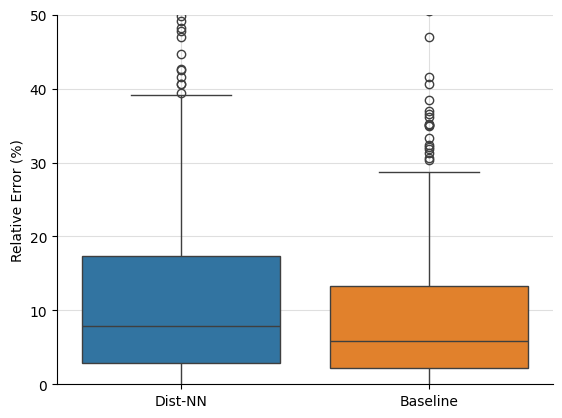

In [493]:
errors = pd.read_csv('rolling_window_10.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [495]:
errors_grouped = errors.groupby(['ticker']).mean()
errors_grouped.sort_values('test_error').head()

,year,quarter,eta,test_error,base_error
ticker,,,,,
LUV,2023.200000,2.700000,0.178055,-0.144719,0.004403
RCL,2023.200000,2.700000,0.134268,-0.112380,-0.112380
MPWR,2023.333333,2.666667,0.022739,0.011918,0.015773
ZTS,2023.000000,2.500000,0.006688,0.028628,0.034823
IQV,2023.200000,2.700000,0.049931,0.031450,0.022982


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1650903057.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


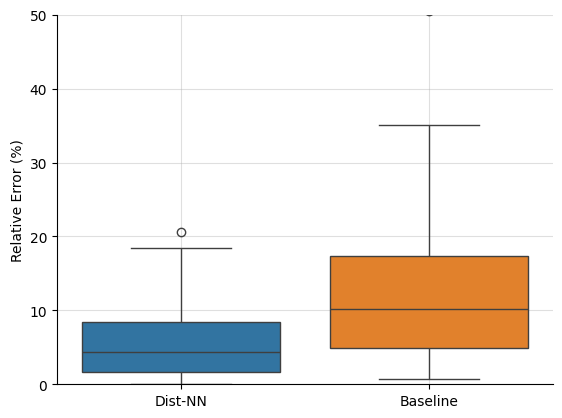

In [498]:
better_errors = errors[errors['test_error'] < errors['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [485]:
# Let's try the seasonal tuning now

output_file = 'seasonal_test.csv'

subset_tickers = random.sample(list(ibes_data.keys()), 10)
print(subset_tickers)

for quarter in range(1, 5):
    train_cols = [(y, quarter) for y in range(2020, 2024)]
    
    test_col = (2024, quarter)
    print(train_cols, test_col)
    i = 0
    
    for oftic in tqdm(subset_tickers):
        try:
            eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means)
            test_error = evaluate_eta_test(eta, oftic, train_cols, [test_col], quarterly_actual, quarterly_data,quarterly_means)
            base_error = evaluate_eta_test(0, oftic, train_cols, [test_col], quarterly_actual, quarterly_data,quarterly_means)
            
            df = pd.DataFrame({'ticker': [oftic],
                                'year': [2024],
                                'quarter': [quarter],
                                'eta': [eta],
                                'test_error': [test_error],
                                'base_error': [base_error]})
            if i == 0 and quarter == 1:
                # Write header only for the first row
                df.to_csv(output_file, mode='w', index=False)
            else:
                # Append to the file without writing the header
                df.to_csv(output_file, mode='a', index=False, header=False)
            i += 1
        except Exception as e:
            print(f"Error for {oftic}: {e}")

['FOXA', 'ULTA', 'AIG', 'APA', 'PGR', 'KDP', 'BK', 'EW', 'HII', 'SW']
[(2020, 1), (2021, 1), (2022, 1), (2023, 1)] (2024, 1)


 60%|██████    | 6/10 [00:08<00:04,  1.24s/it]

Error for KDP: (2020, 1)


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


Error for SW: (2020, 1)
[(2020, 2), (2021, 2), (2022, 2), (2023, 2)] (2024, 2)


100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


Error for SW: (2020, 2)
[(2020, 3), (2021, 3), (2022, 3), (2023, 3)] (2024, 3)


 70%|███████   | 7/10 [00:16<00:04,  1.53s/it]

Error for BK: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


Error for SW: (2020, 3)
[(2020, 4), (2021, 4), (2022, 4), (2023, 4)] (2024, 4)


 20%|██        | 2/10 [00:02<00:08,  1.04s/it]

Error for ULTA: division by zero


100%|██████████| 10/10 [00:15<00:00,  1.51s/it]

Error for SW: (2020, 4)


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/511042831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


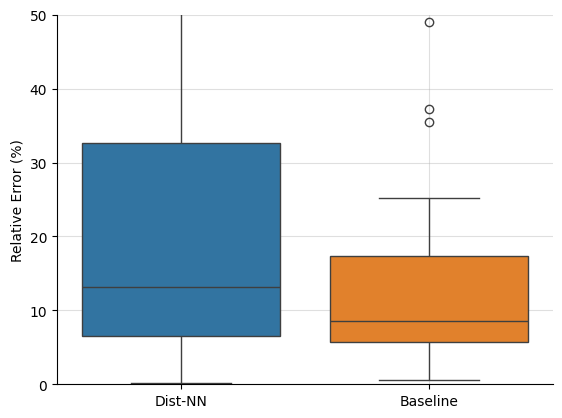

In [486]:
errors = pd.read_csv('seasonal_test.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [487]:
errors.head()

,ticker,year,quarter,eta,test_error,base_error
0,FOXA,2024,1,0.020278,0.716873,0.716873
1,ULTA,2024,1,0.044637,0.072033,0.072033
2,AIG,2024,1,0.000161,0.069236,0.069236
3,APA,2024,1,0.006163,0.251774,0.251774
4,PGR,2024,1,0.025904,0.205694,0.205694


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/582583394.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


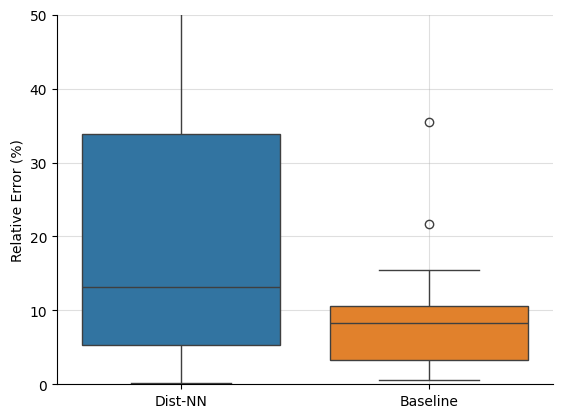

In [488]:
# Filter out where only used own data
errors_filtered = errors[errors['test_error'] != errors['base_error']].sort_values('test_error')

errors_total = np.array([errors_filtered['test_error'].values * 100, errors_filtered['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/4050003589.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


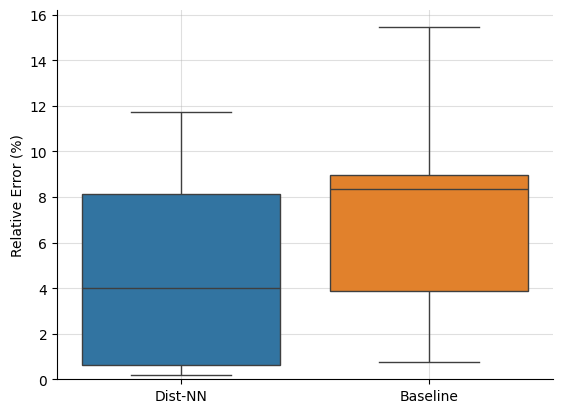

In [490]:
better_errors = errors_filtered[errors_filtered['test_error'] < errors_filtered['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0)
plt.ylabel("Relative Error (%)")
plt.show()

In [491]:
better_errors

,ticker,year,quarter,eta,test_error,base_error
29,KDP,2024,4,0.007480,0.001789,0.007547
13,KDP,2024,2,0.006066,0.003364,0.085981
15,EW,2024,2,0.036475,0.015163,0.024859
14,BK,2024,2,0.014072,0.064860,0.080746
17,FOXA,2024,3,0.222394,0.086933,0.090562
5,BK,2024,1,0.123913,0.117236,0.154522
